In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('HR Employee Attrition.csv')

In [5]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

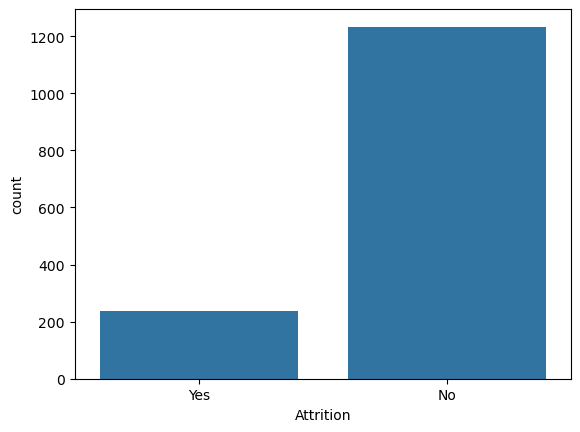

In [9]:
## Большинство сотрудников не уволились

sns.countplot(df, x='Attrition');

У нас нет пропущенных значений. Проанализируем каждый стоблик

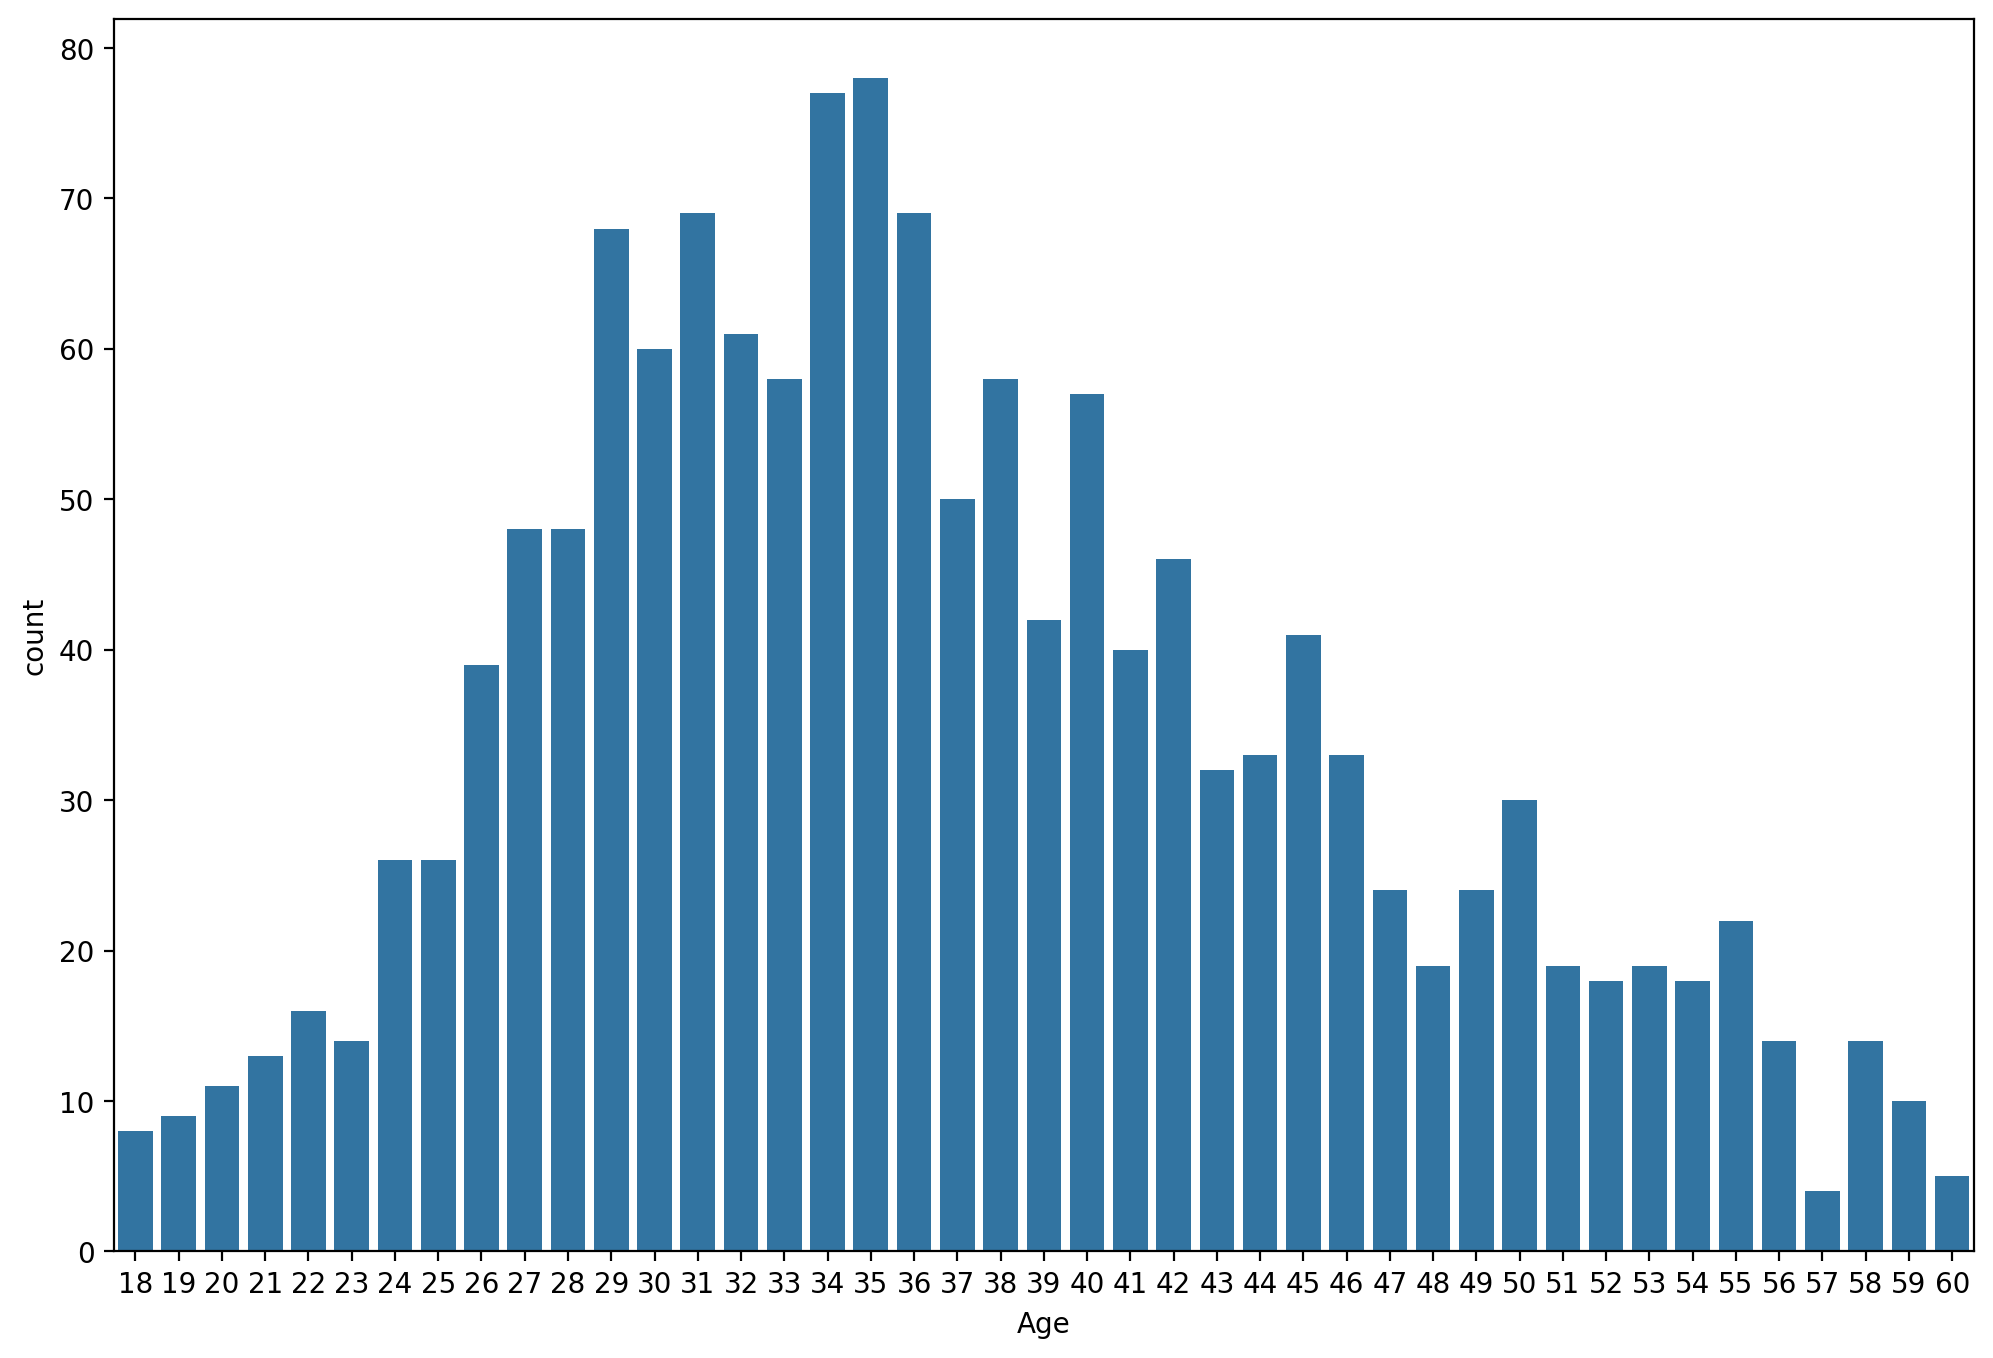

In [13]:
## Большинство людей в возрасте от 26 до 42 лет

plt.figure(figsize=(12,8), dpi=200)

sns.countplot(df, x='Age');

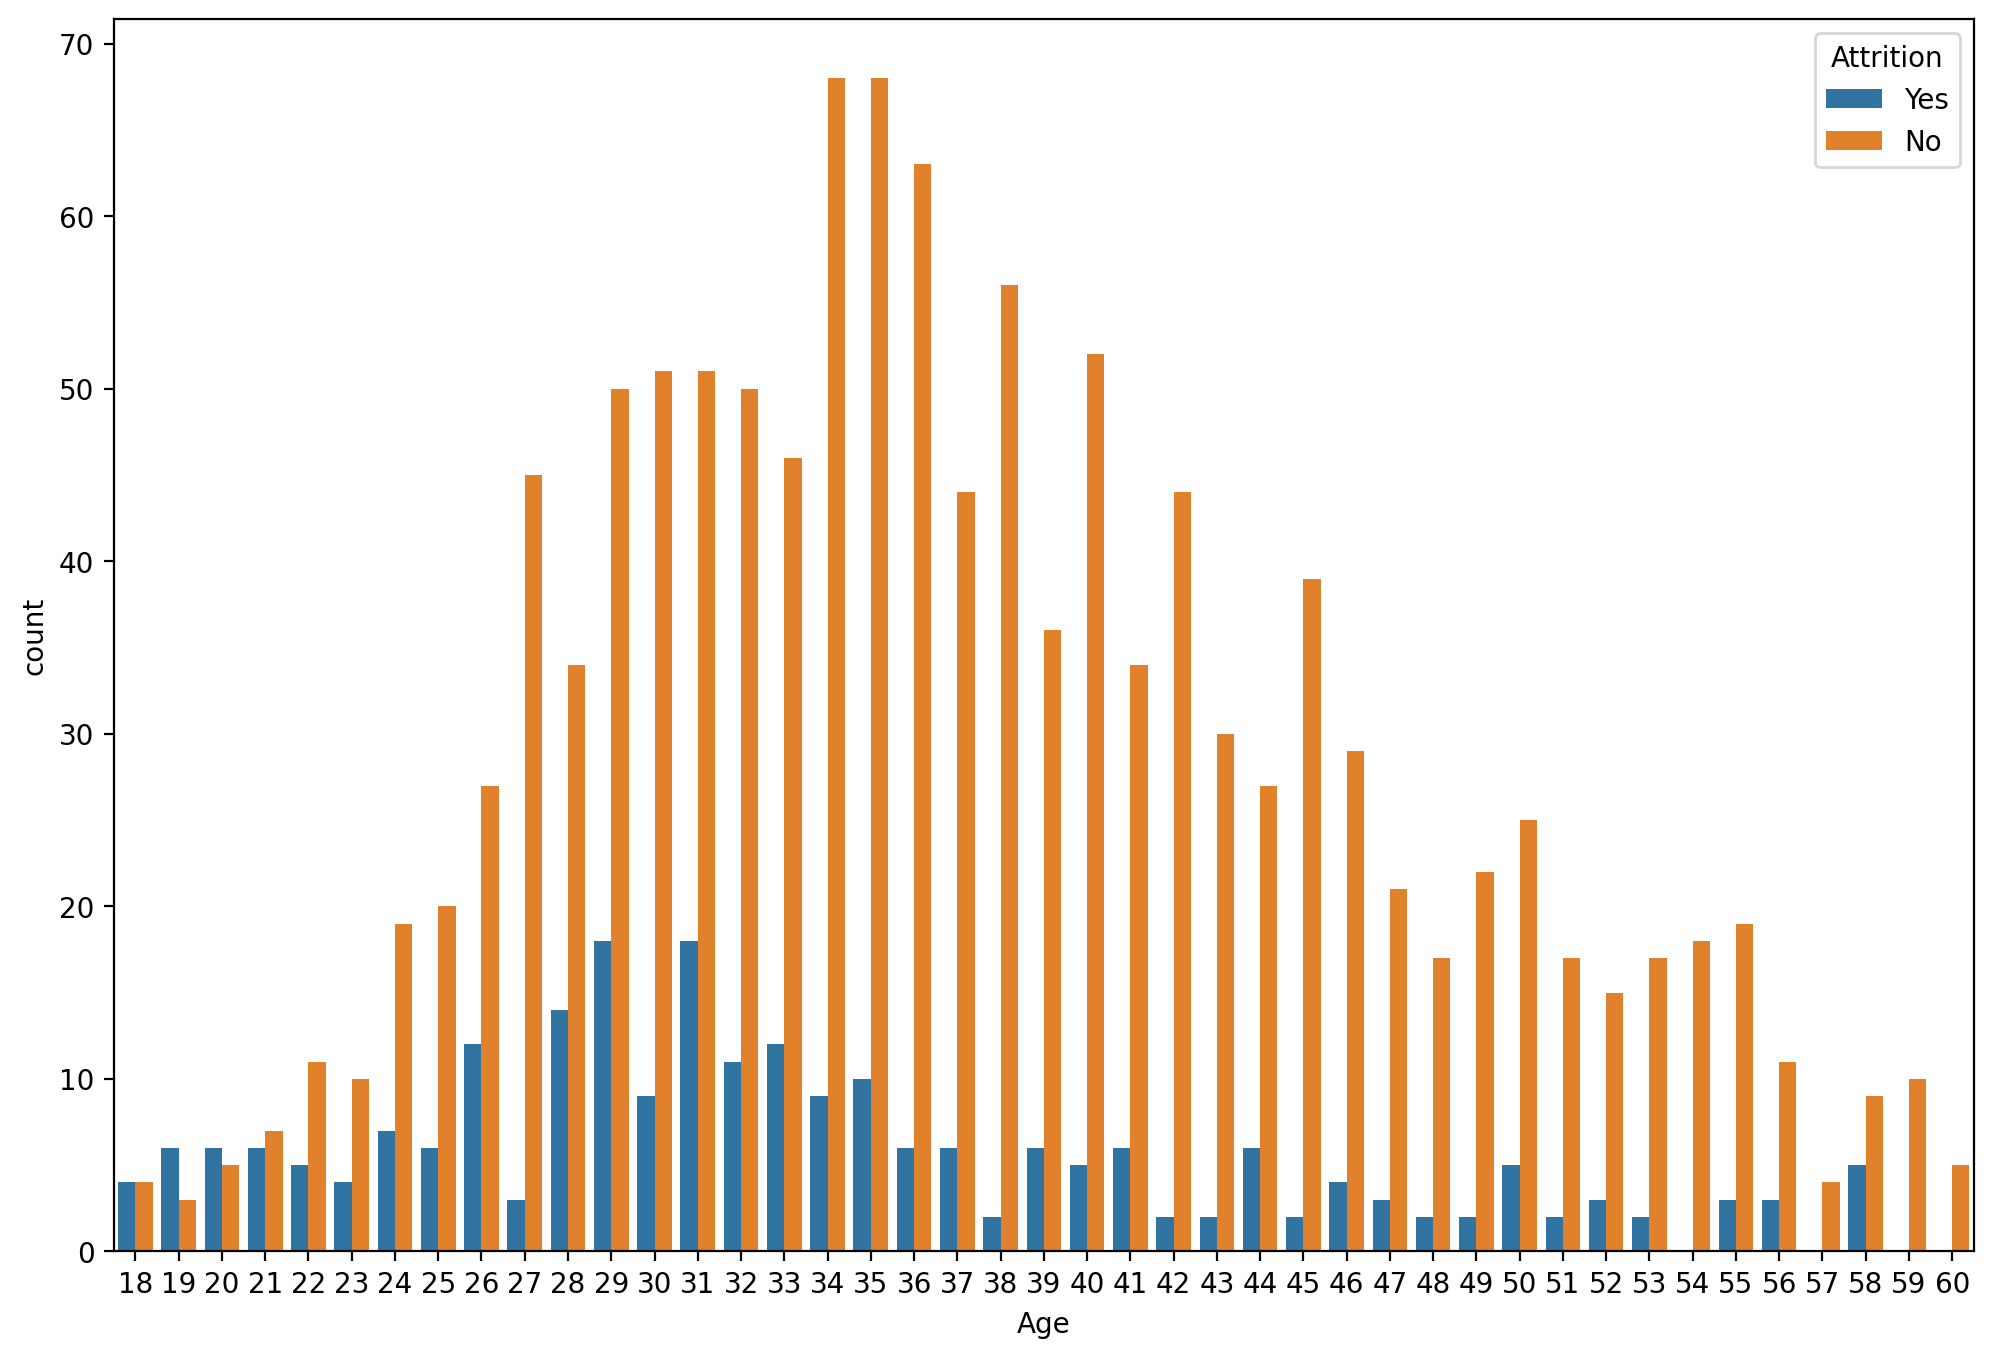

In [15]:
## Больше всего уволилось людей в возрасте от 28 до 31 года.

plt.figure(figsize=(12,8), dpi=200)

sns.countplot(df, x='Age', hue='Attrition');

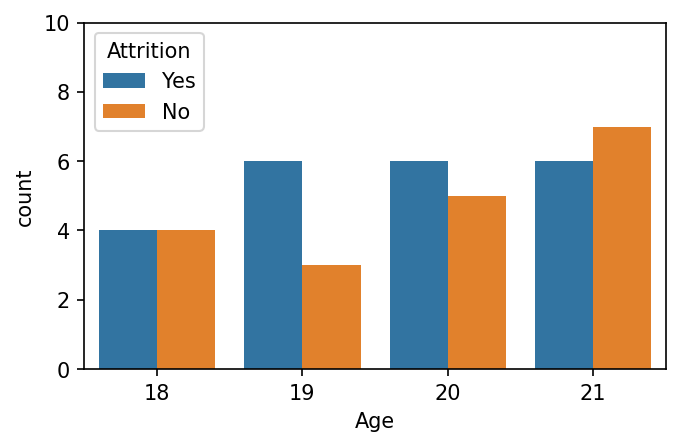

In [17]:
## Также важно отметить большой процент увольнения среди самых юных сотрудников в возрасте от 18 до 21 года

plt.figure(figsize=(5,3), dpi=150)

sns.countplot(df, x='Age', hue='Attrition')
plt.xlim((-0.5, 3.5))
plt.ylim((0, 10));

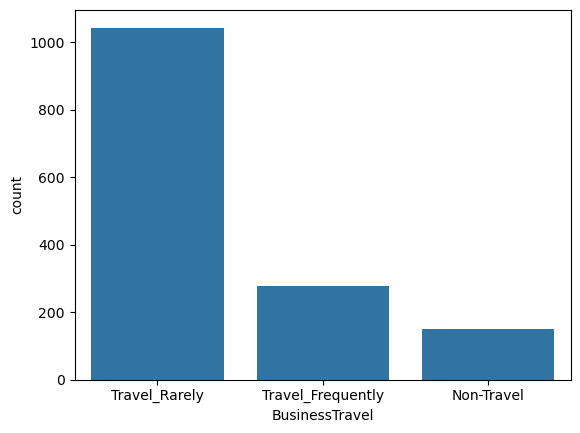

In [19]:
## Как мы видим, большинство человек редко путешуствуют по рабочим вопросам

sns.countplot(df, x='BusinessTravel');

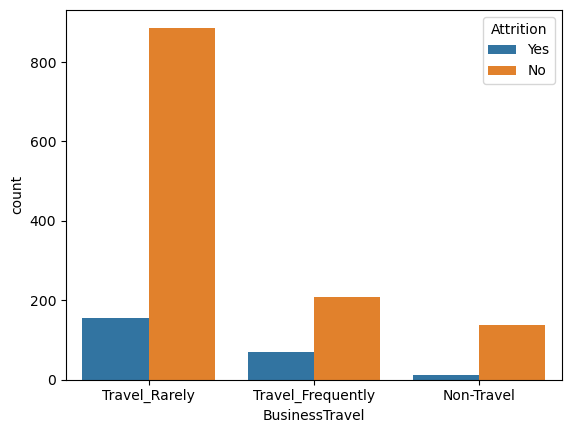

In [21]:
## На графике сложно определить зависимость увольнения от частоты командировок. Нужно Посчитать в процентом соотношении

sns.countplot(df, x='BusinessTravel', hue='Attrition');

In [23]:
df.groupby(['BusinessTravel', 'Attrition'])['Age'].count()

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Age, dtype: int64

In [25]:
print(f'Процент уволившихся среди тех у кого нет командировок: {12 / 150 * 100}%')
print(f'Процент уволившихся среди тех у кого редко командировки: {np.round(156 / 1043 * 100, 2)}%')
print(f'Процент уволившихся среди тех у кого часто командировки: {np.round(69 / 277 * 100, 2)}%')

Процент уволившихся среди тех у кого нет командировок: 8.0%
Процент уволившихся среди тех у кого редко командировки: 14.96%
Процент уволившихся среди тех у кого часто командировки: 24.91%


Как мы видим, наиболее часто увольняются те, у кого много командировок

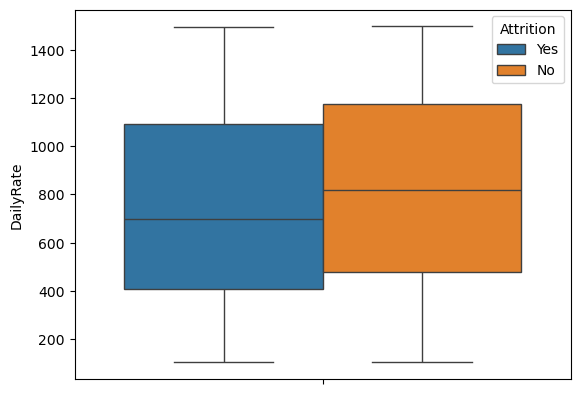

In [28]:
## Ежедневный заработок у уволившихся в среднем чуть меньше

sns.boxplot(df, y='DailyRate', hue='Attrition');

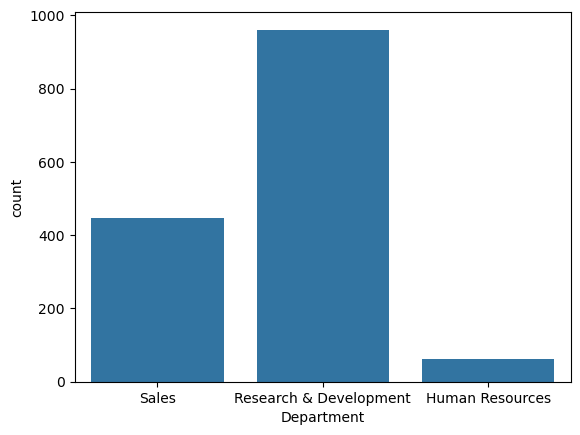

In [30]:
## Всего 3 отдела, большинство сотрудников в отделе исследований и разработки.

sns.countplot(df, x='Department');

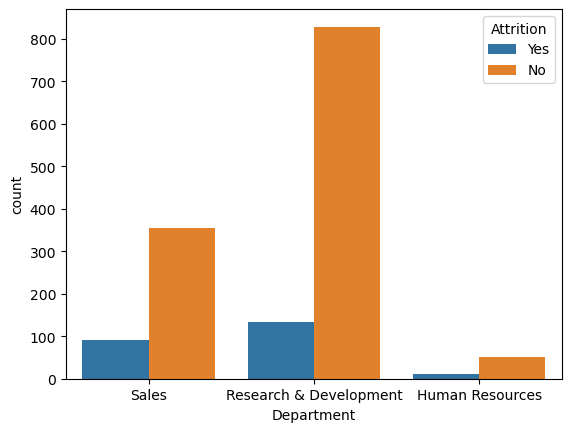

In [32]:
## Также лучше посчитать проценты

sns.countplot(df, x='Department', hue='Attrition');

In [34]:
df.groupby(['Department', 'Attrition'])['Age'].count()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Age, dtype: int64

In [36]:
print(f'Процент уволившихся среди тех кто работает в отделе продаж: {np.round(92 / 446 * 100, 2)}%')
print(f'Процент уволившихся среди тех кто работает в отделе исследований и разработки {np.round(133 / 961 * 100, 2)}%')
print(f'Процент уволившихся среди тех кто работает в отделе HR: {np.round(12 / 63 * 100, 2)}%')

Процент уволившихся среди тех кто работает в отделе продаж: 20.63%
Процент уволившихся среди тех кто работает в отделе исследований и разработки 13.84%
Процент уволившихся среди тех кто работает в отделе HR: 19.05%


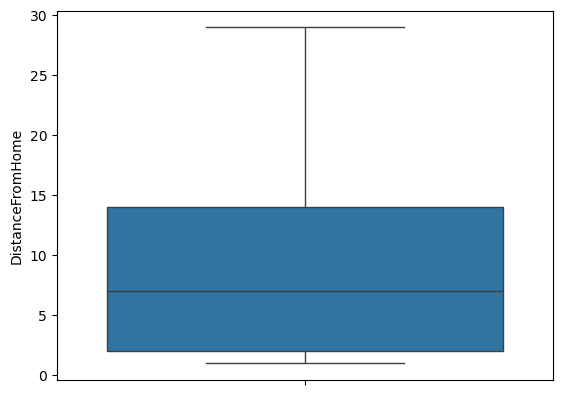

In [38]:
## У большинства сотрудников расстояние от дома в пределах 2-14 миль

sns.boxplot(df, y='DistanceFromHome');

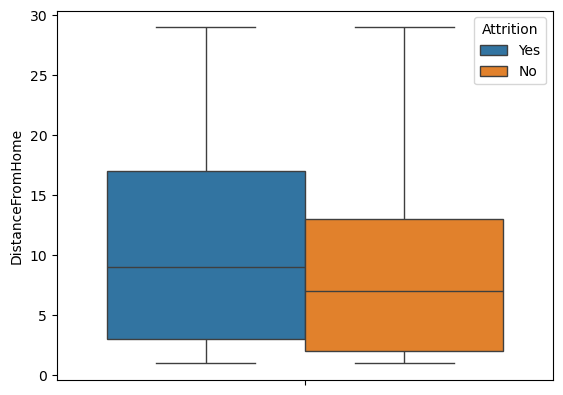

In [40]:
## Расстояние до работы у уволившихся сотрудников в среднем больше

sns.boxplot(df, y='DistanceFromHome', hue='Attrition');

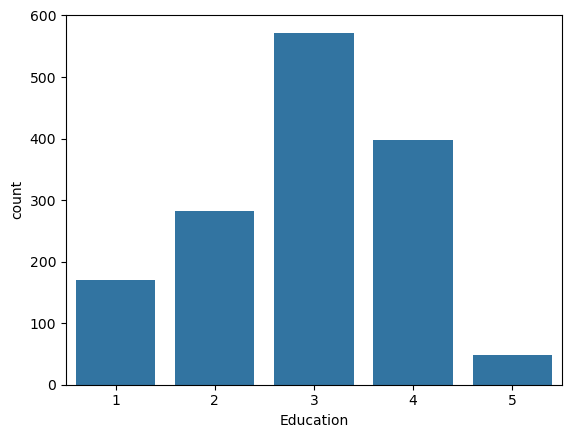

In [42]:
## К сожалению в описании данных нет конкретных уровней образования

sns.countplot(df, x=df['Education']);

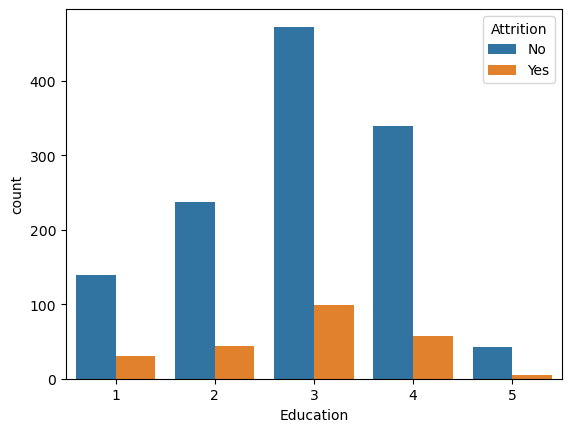

In [44]:
## Тут мы видим что увольнение практически не зависит от уровня образования, везде +- одинаковое соотношение

sns.countplot(df, x=df['Education'], hue='Attrition');

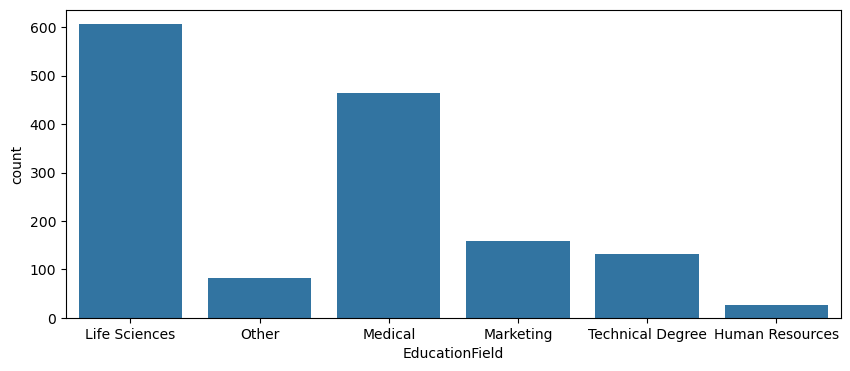

In [46]:
## Большинство сотрудников имеет образование в сфере естественных наук и медицины

plt.figure(figsize=(10, 4))

sns.countplot(df, x='EducationField');

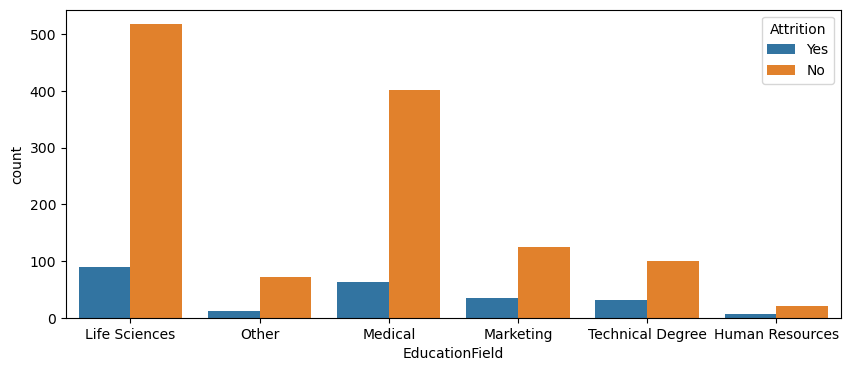

In [48]:
## как мы видим, отрасль в которой сотрудник получал образование тоже не играет сильной роли в увольнении

plt.figure(figsize=(10, 4))

sns.countplot(df, x='EducationField', hue='Attrition');

In [50]:
## колонка EmployeeCount состоит всего из 1 значения. Она не несет в себе абсолютно никакой информации, ее можно удалить.

df['EmployeeCount'].nunique()

1

In [52]:
df = df.drop('EmployeeCount', axis=1)

In [54]:
## Это еще один индекс, который нам по сути не нужен. Тоже можем удалить либо сделать в качестве индекса. Для разнообразия сделаем индексом

df['EmployeeNumber'].nunique()

1470

In [56]:
df = df.set_index('EmployeeNumber')

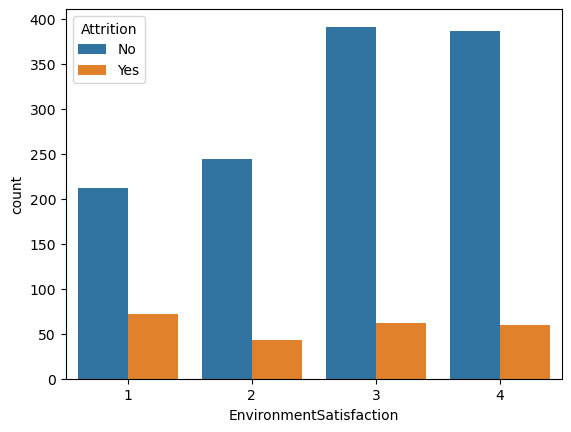

In [58]:
## Больше увольняются те, кому не нравится окружение

sns.countplot(df, x='EnvironmentSatisfaction', hue='Attrition');

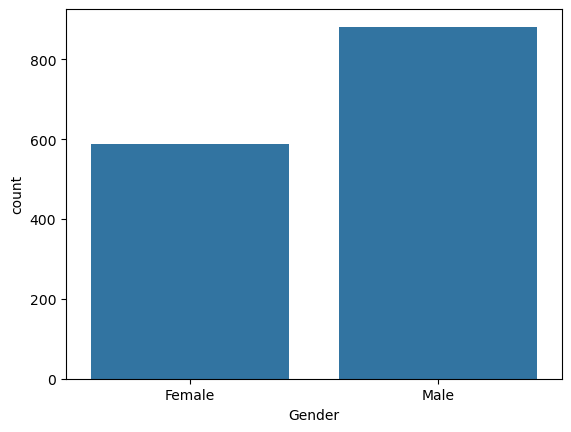

In [60]:
## Мужчин больше чем женщин

sns.countplot(df, x='Gender');

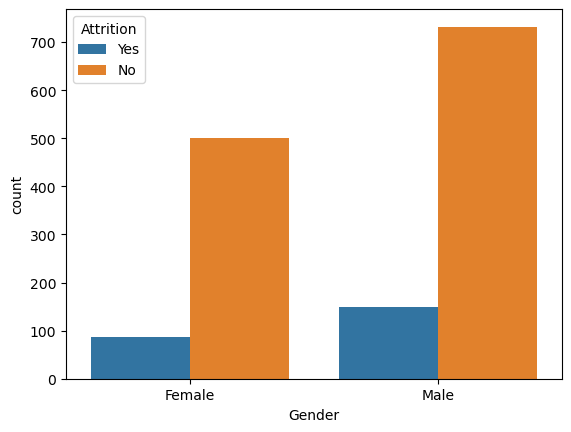

In [62]:
## Увольнение практически не зависит от пола

sns.countplot(df, x='Gender', hue='Attrition');

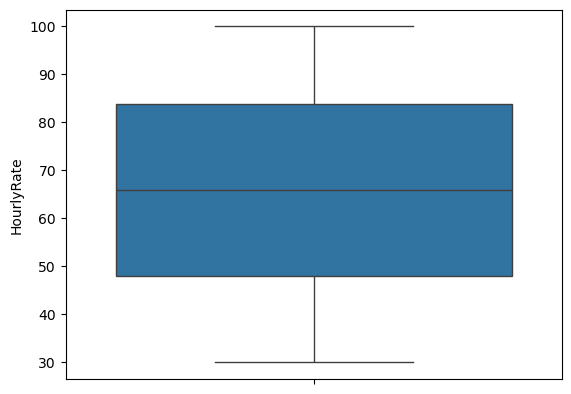

In [68]:
## Средняя часовая ставка в пределах от 48 до 83 единиц в час

sns.boxplot(df, y='HourlyRate');

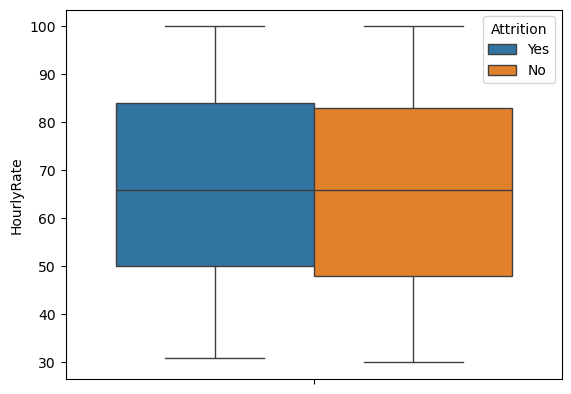

In [70]:
## Уволился ли человек практически не зависит от часовой ставки

sns.boxplot(df, y='HourlyRate', hue='Attrition');

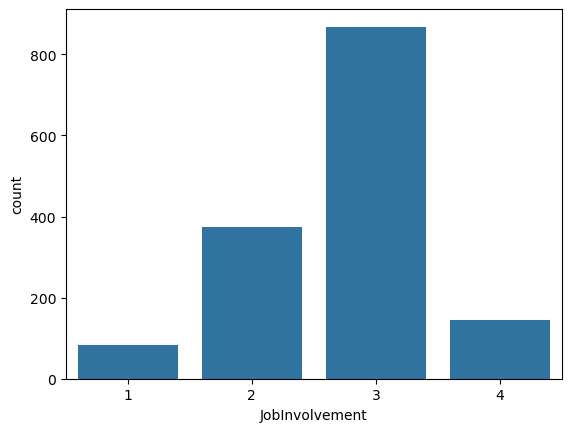

In [74]:
## Больше половины сотрудников достаточно сильно вовлечены в работу

sns.countplot(df, x='JobInvolvement');

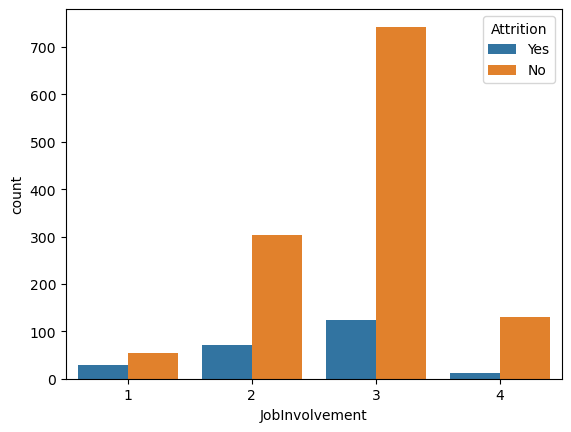

In [76]:
## На графике видно, что уровень вовлеченности играет большую роль при увольнении

sns.countplot(df, x='JobInvolvement', hue='Attrition');

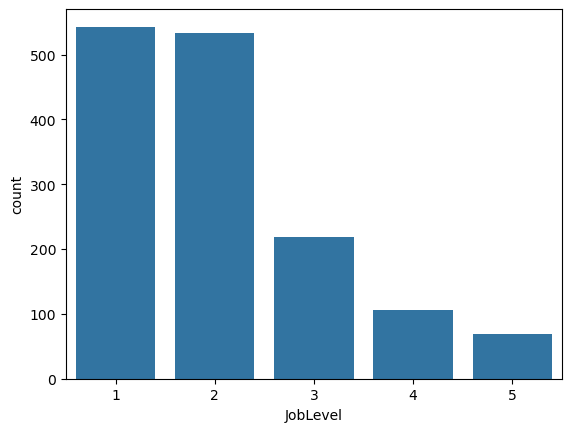

In [78]:
## Примерно 2/3 сотрудников на 1-2 уровне

sns.countplot(df, x='JobLevel');

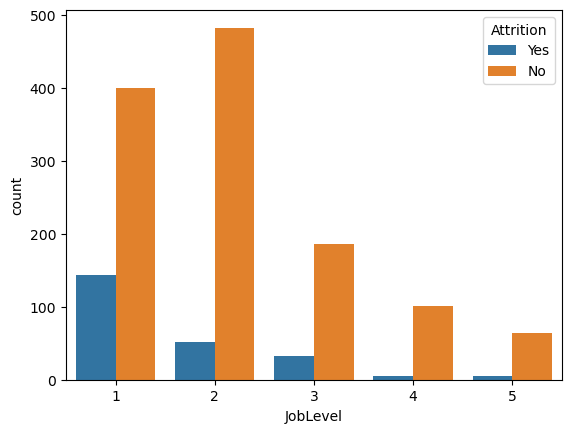

In [80]:
## Увольняются больше всего в процентном соотношении сотрудники 1 уровня

sns.countplot(df, x='JobLevel', hue='Attrition');

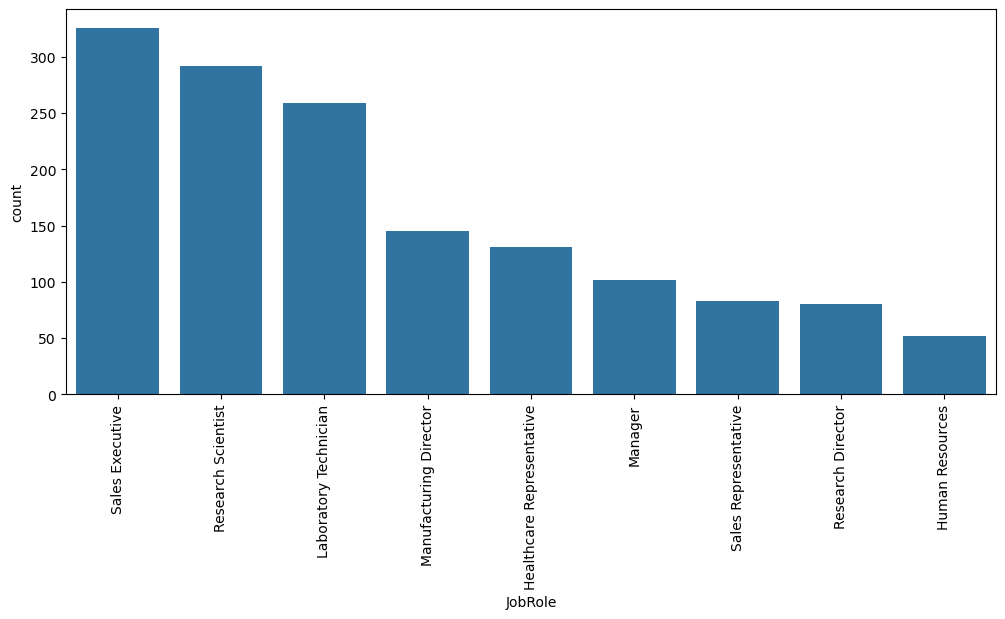

In [82]:
plt.figure(figsize=(12,5))

sns.countplot(df, x='JobRole')
plt.xticks(rotation=90);

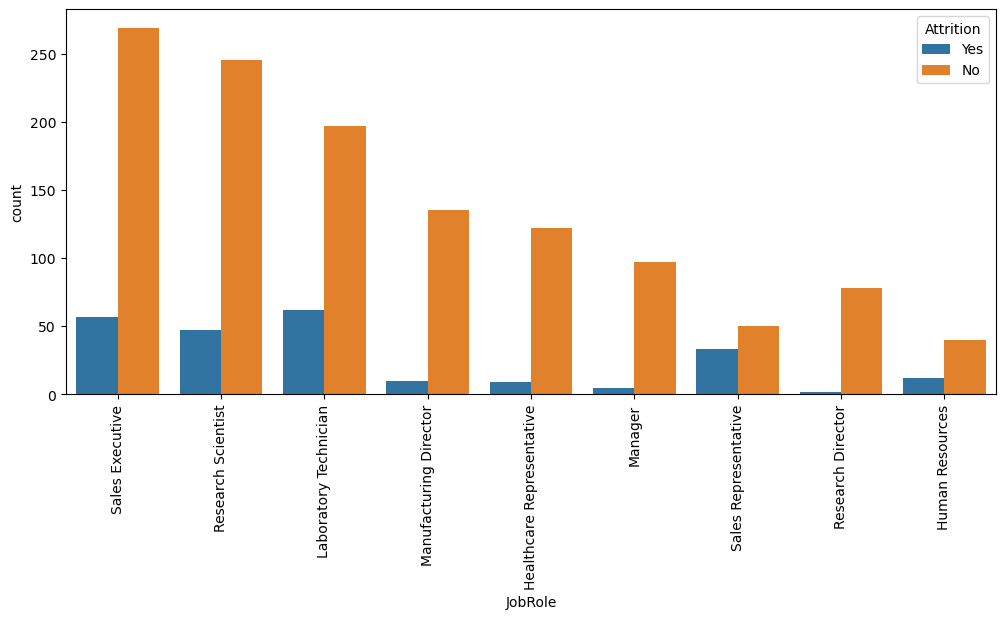

In [84]:
## В процентном соотношении больше всего увольняются менеджеры по продажам

plt.figure(figsize=(12,5))

sns.countplot(df, x='JobRole', hue='Attrition')
plt.xticks(rotation=90);

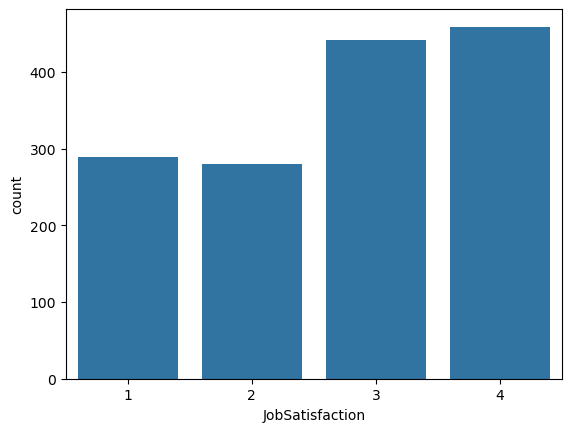

In [86]:
sns.countplot(df, x='JobSatisfaction');

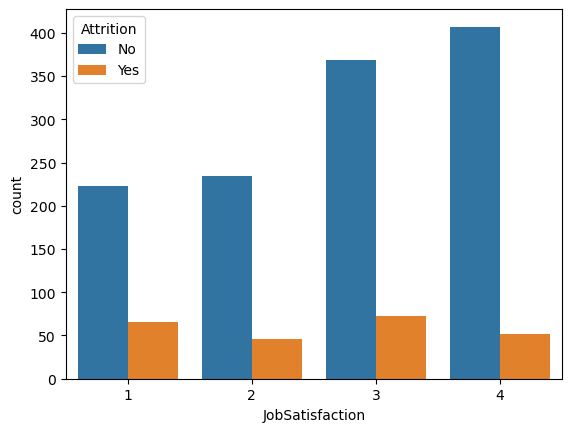

In [88]:
## Чаще увольняются те, кто не доволен своей работой

sns.countplot(df, x='JobSatisfaction', hue='Attrition');

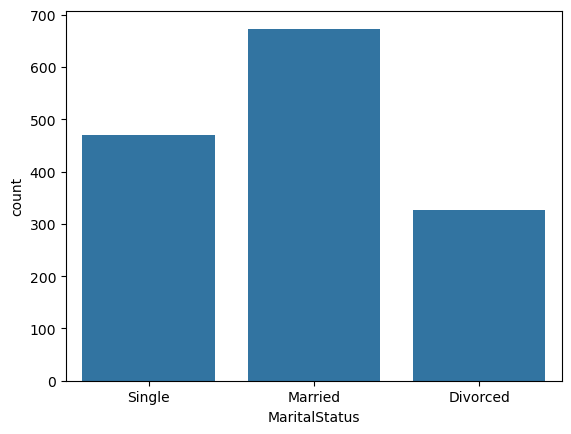

In [90]:
sns.countplot(df, x='MaritalStatus');

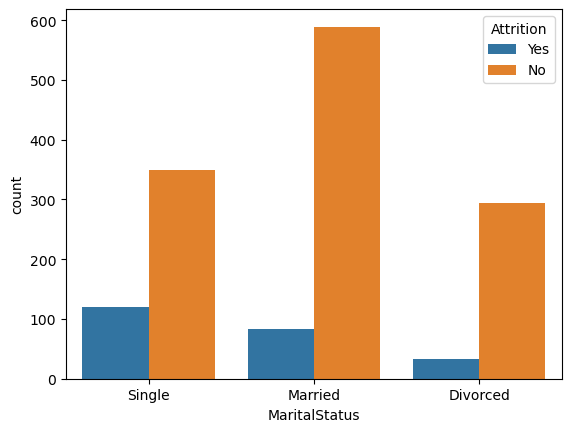

In [92]:
## Чаще увольнятся одиночки, в то время как семейные реже всего

sns.countplot(df, x='MaritalStatus', hue='Attrition');

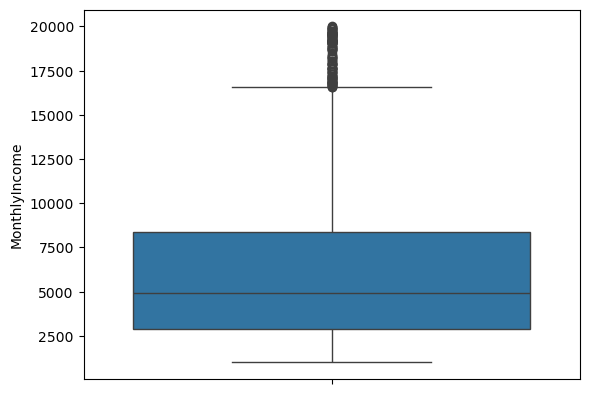

In [94]:
sns.boxplot(df, y='MonthlyIncome');

In [96]:
df.describe()['MonthlyIncome']

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [98]:
## Достаточно большой процент людей из общей выборки выходит за 75 квартиль. Значит это не выбросы

df[df['MonthlyIncome'] > 8379].count()['Age']

368

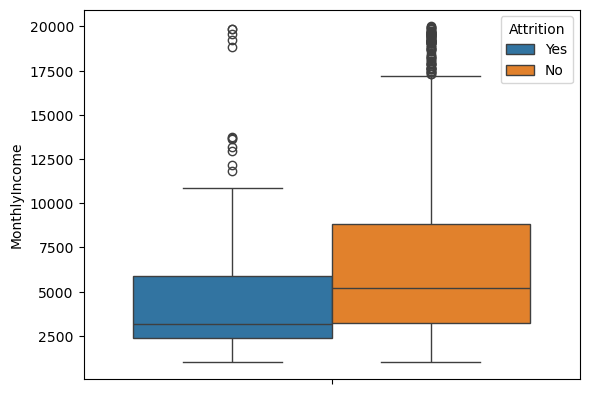

In [100]:
## Сотрудники с меньшим месячным доходом увольняются чаще

sns.boxplot(df, y='MonthlyIncome', hue='Attrition');

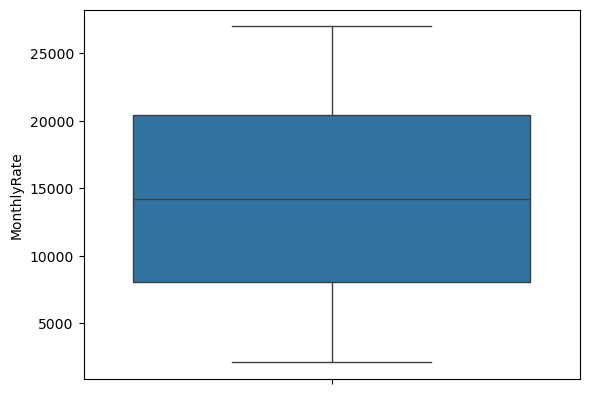

In [102]:
sns.boxplot(df, y='MonthlyRate');

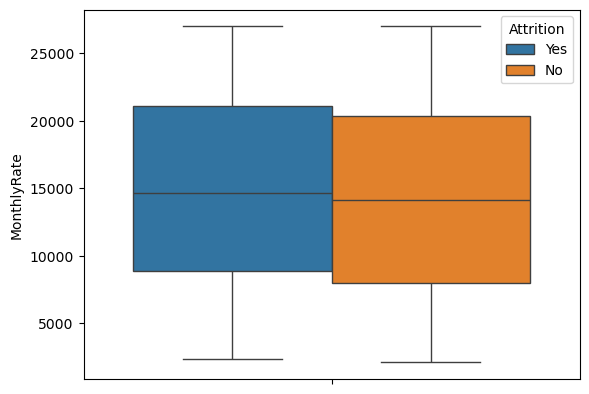

In [104]:
sns.boxplot(df, y='MonthlyRate', hue='Attrition');

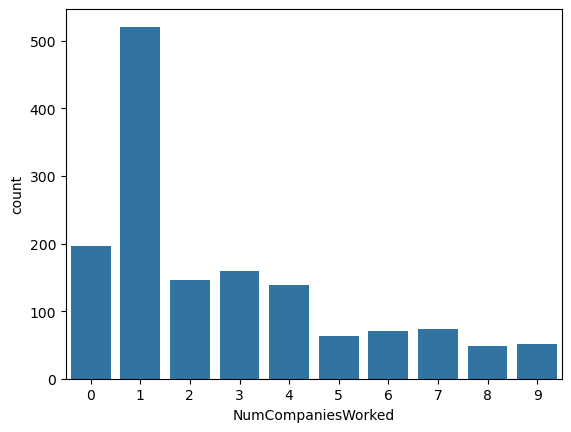

In [106]:
## Основная часть сотрудников прежде работала в других компаниях

sns.countplot(df, x='NumCompaniesWorked');

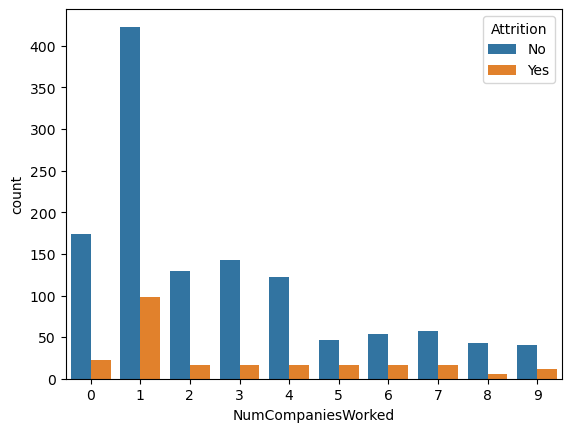

In [108]:
## Кол-во компаний не особо сильно влияет на увольнение. Скорее всего никак не влияет, а просто совпадение

sns.countplot(df, x='NumCompaniesWorked', hue='Attrition');

In [110]:
## Все сотрудники старше 18, можно удалить данную колонку

df['Over18'].unique()

array(['Y'], dtype=object)

In [112]:
df = df.drop('Over18', axis=1)

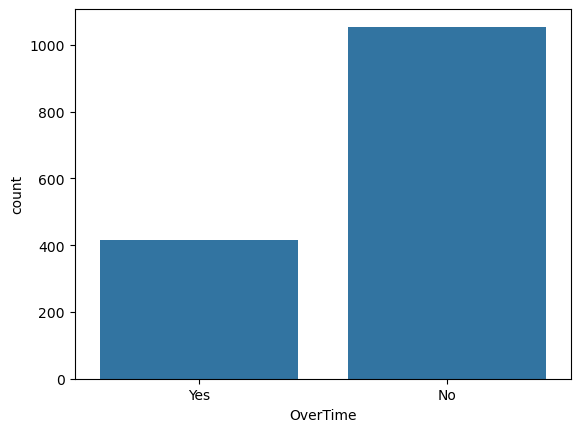

In [114]:
## Более чем 2/3 сотрудников не перерабатывают

sns.countplot(df, x='OverTime');

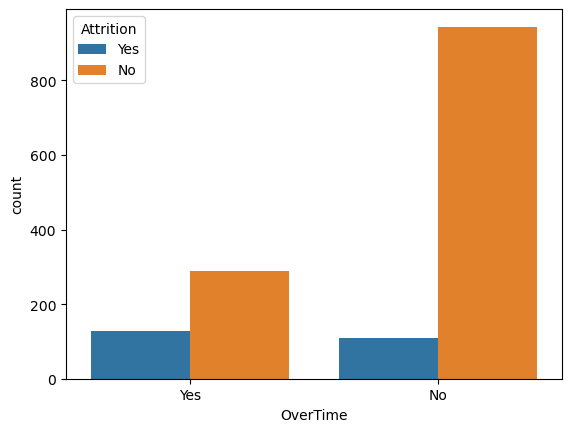

In [116]:
## Заметно, что переработки сильно влияют на увольнение

sns.countplot(df, x='OverTime', hue='Attrition');

In [118]:
df['PercentSalaryHike'].nunique()

15

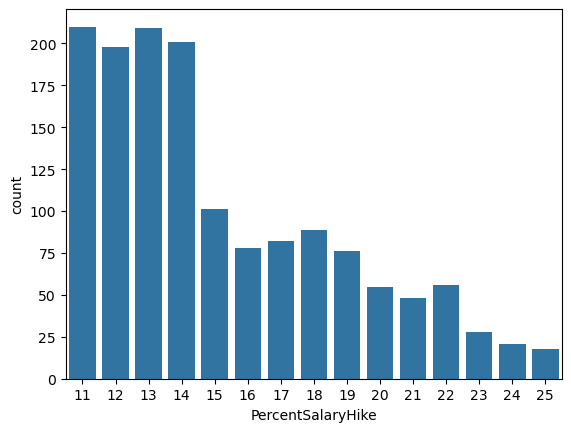

In [120]:
## У примерно половины сотрудников ставка поднималась не более чем на 15%

sns.countplot(df, x='PercentSalaryHike');

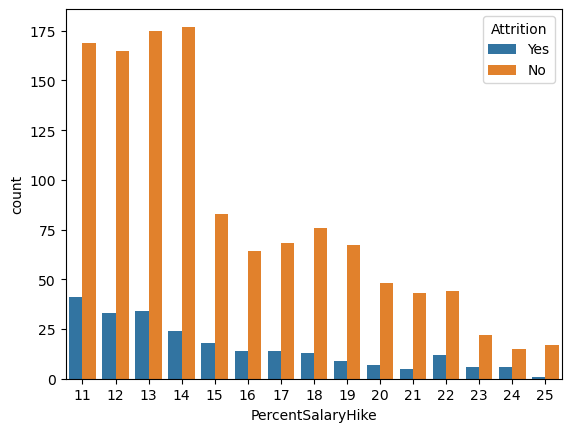

In [122]:
## На графике не видно сильной зависимости

sns.countplot(df, x='PercentSalaryHike', hue='Attrition');

In [124]:
df['PerformanceRating'].unique()

array([3, 4])

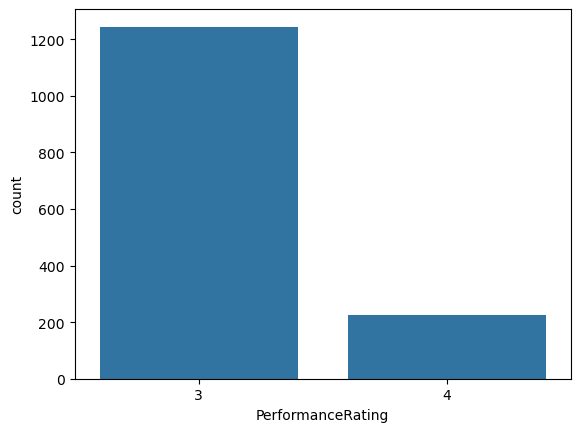

In [126]:
## У большинмтва сотрудников рейтинг 3

sns.countplot(df, x='PerformanceRating');

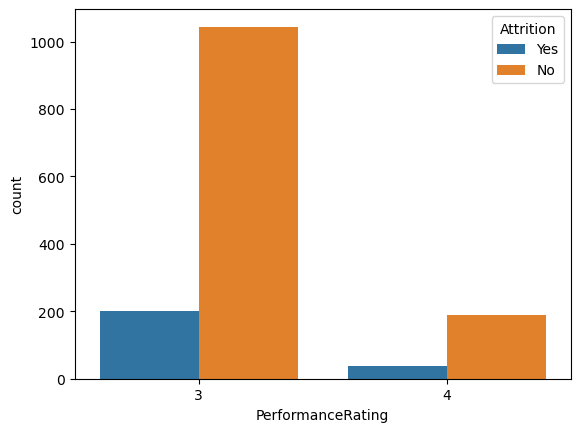

In [128]:
## Стоит посчитать проценты

sns.countplot(df, x='PerformanceRating', hue='Attrition');

In [130]:
df.groupby(['PerformanceRating', 'Attrition']).count()['Age']

PerformanceRating  Attrition
3                  No           1044
                   Yes           200
4                  No            189
                   Yes            37
Name: Age, dtype: int64

In [132]:
## Рейтинг сотрудника не влияет на увольнение. Можно удалить данный признак

print(f'Процент уволившихся сотрудников чей рейтинг = 3: {np.round(200 / 1244 * 100)}%')
print(f'Процент уволившихся сотрудников чей рейтинг = 4: {np.round(37 / 226 * 100)}%')

Процент уволившихся сотрудников чей рейтинг = 3: 16.0%
Процент уволившихся сотрудников чей рейтинг = 4: 16.0%


In [134]:
df = df.drop('PerformanceRating', axis=1)

In [136]:
df['RelationshipSatisfaction'].nunique()

4

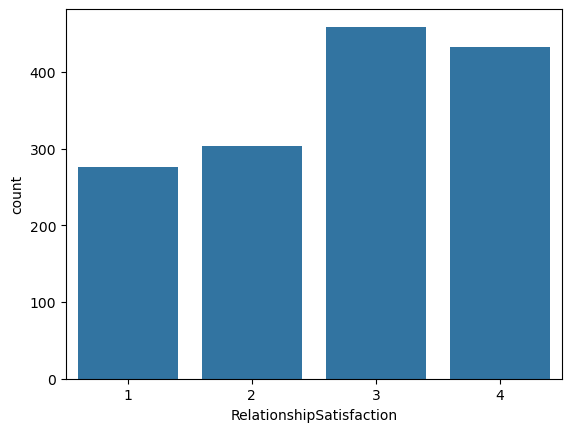

In [138]:
sns.countplot(df, x='RelationshipSatisfaction');

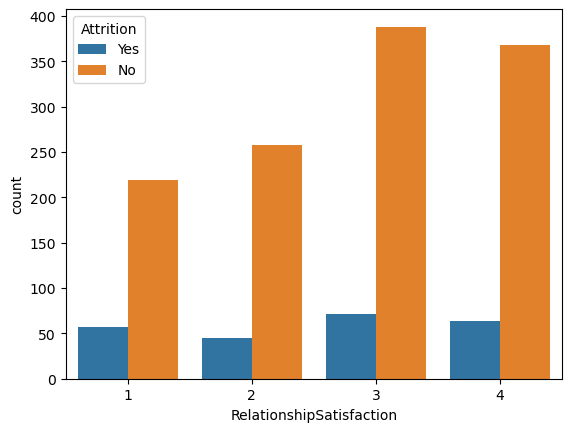

In [140]:
## Больше всего увольняются те, у кого межличностные отношения хуже всего

sns.countplot(df, x='RelationshipSatisfaction', hue='Attrition');

In [142]:
## Данная колонка имеет всего 1 значение, ее можно удалить

df['StandardHours'].nunique()

1

In [144]:
df = df.drop('StandardHours', axis=1)

In [146]:
df['StockOptionLevel'].nunique()

4

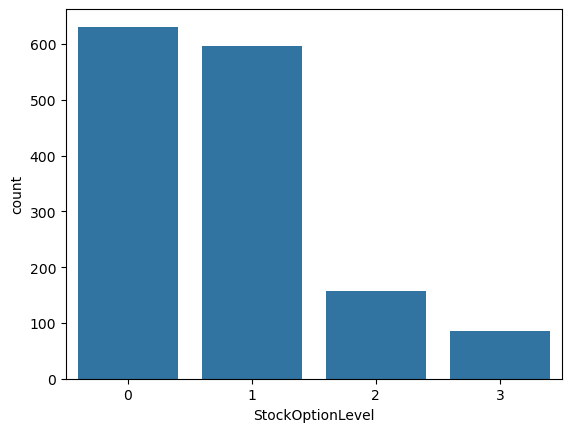

In [148]:
## Большому количеству сотрудников не выплачиваются акции компании или уровень выплат минимален

sns.countplot(df, x='StockOptionLevel');

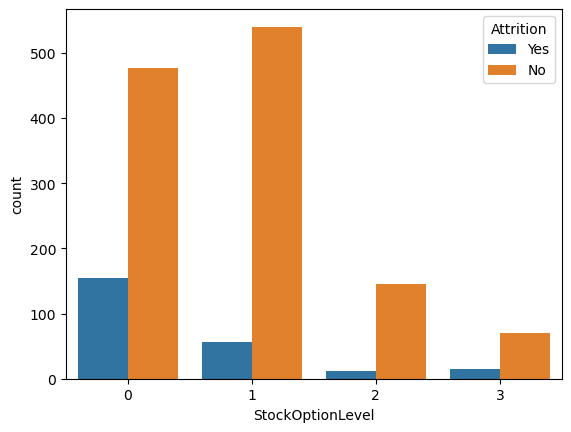

In [150]:
## Посчитаем проценты

sns.countplot(df, x='StockOptionLevel', hue='Attrition');

In [152]:
df.groupby(['StockOptionLevel', 'Attrition']).count()['Age']

StockOptionLevel  Attrition
0                 No           477
                  Yes          154
1                 No           540
                  Yes           56
2                 No           146
                  Yes           12
3                 No            70
                  Yes           15
Name: Age, dtype: int64

In [154]:
## Скорее всего это никак не связано с увольнением

print(f'Процент уволившихся сотрудников чей уровень выплат акциями = 0: {np.round(154 / 631 * 100)}%')
print(f'Процент уволившихся сотрудников чей уровень выплат акциями = 1: {np.round(56 / 596 * 100)}%')
print(f'Процент уволившихся сотрудников чей уровень выплат акциями = 2: {np.round(12 / 158 * 100)}%')
print(f'Процент уволившихся сотрудников чей уровень выплат акциями = 3: {np.round(15 / 85 * 100)}%')

Процент уволившихся сотрудников чей уровень выплат акциями = 0: 24.0%
Процент уволившихся сотрудников чей уровень выплат акциями = 1: 9.0%
Процент уволившихся сотрудников чей уровень выплат акциями = 2: 8.0%
Процент уволившихся сотрудников чей уровень выплат акциями = 3: 18.0%


In [156]:
df['TotalWorkingYears'].nunique()

40

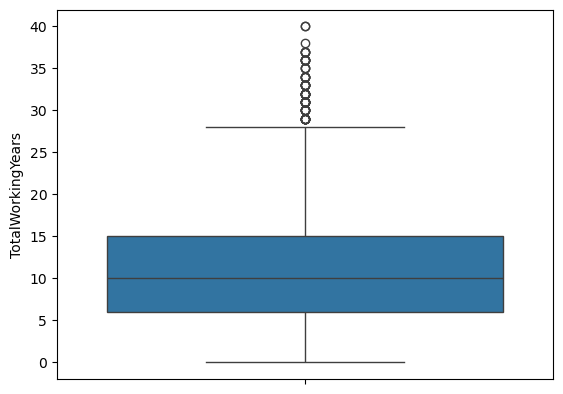

In [158]:
## Большинство сотрудников работают от 6 до 15 лет

sns.boxplot(df, y='TotalWorkingYears');

In [160]:
df.describe()['TotalWorkingYears']

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [162]:
## Тоже не является выбросом.

df[df['TotalWorkingYears'] > 28].count()['Age']

63

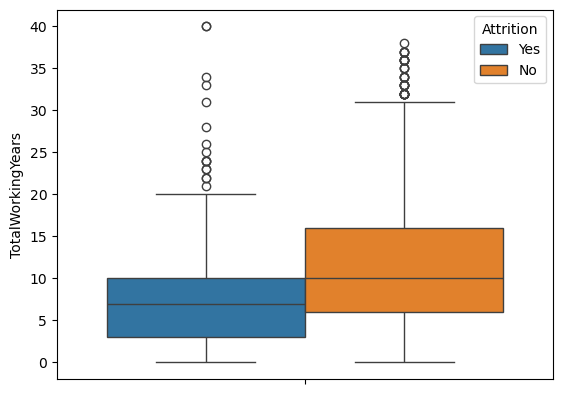

In [164]:
## Чаще всего увольняются те кто меньше проработал

sns.boxplot(df, y='TotalWorkingYears', hue='Attrition');

In [166]:
df['TrainingTimesLastYear'].nunique()

7

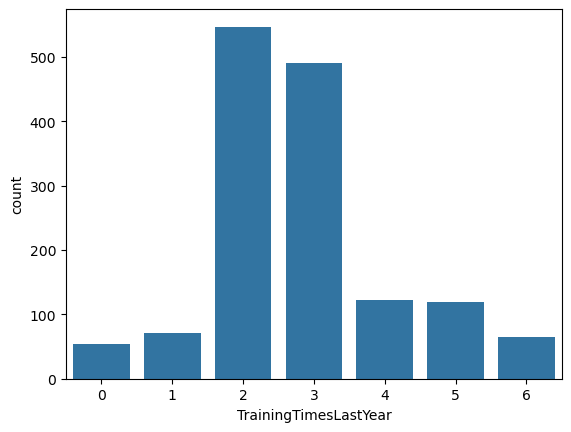

In [168]:
## Большинство сотрудников в прошлом году обучались 2 или 3 раза

sns.countplot(df, x='TrainingTimesLastYear');

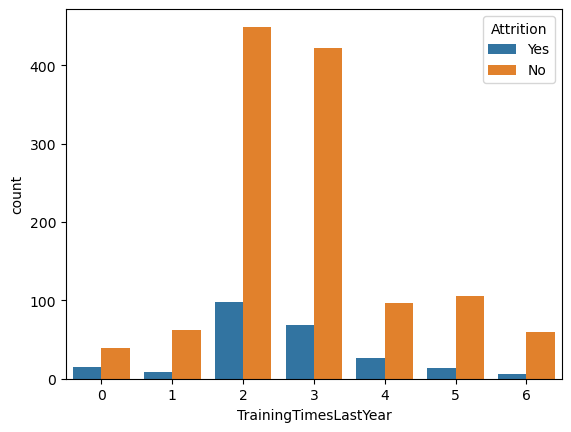

In [170]:
## Больше всего увольнялись те, кто не ходил на тренинги (в процентном соотношении)

sns.countplot(df, x='TrainingTimesLastYear', hue='Attrition');

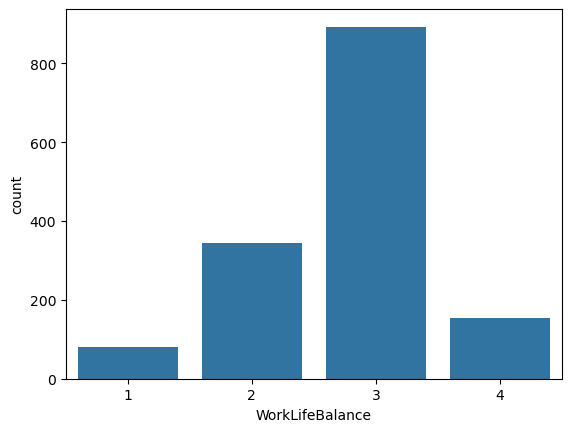

In [172]:
sns.countplot(df, x='WorkLifeBalance');

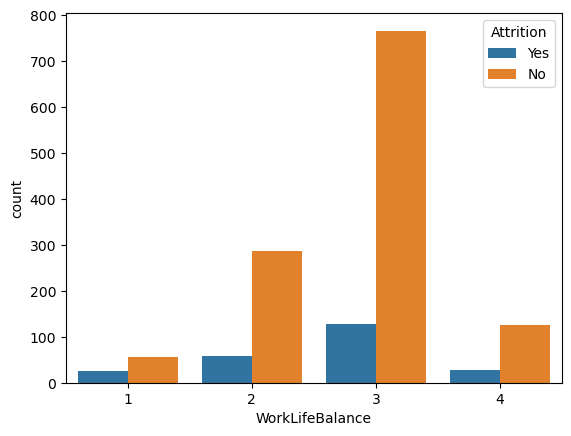

In [174]:
sns.countplot(df, x='WorkLifeBalance', hue='Attrition');

In [176]:
df.groupby(['WorkLifeBalance', 'Attrition']).count()['Age']

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Age, dtype: int64

In [178]:
## Чаще всего увольняются те, кто не может соблюсти баланс

print(f'Процент уволившихся среди тех у кого WorkLifeBalance = 1: {np.round(25 / 80 * 100)}%')
print(f'Процент уволившихся среди тех у кого WorkLifeBalance = 2: {np.round(58 / 344 * 100)}%')
print(f'Процент уволившихся среди тех у кого WorkLifeBalance = 3: {np.round(127 / 893 * 100)}%')
print(f'Процент уволившихся среди тех у кого WorkLifeBalance = 4: {np.round(27 / 153 * 100)}%')

Процент уволившихся среди тех у кого WorkLifeBalance = 1: 31.0%
Процент уволившихся среди тех у кого WorkLifeBalance = 2: 17.0%
Процент уволившихся среди тех у кого WorkLifeBalance = 3: 14.0%
Процент уволившихся среди тех у кого WorkLifeBalance = 4: 18.0%


In [180]:
df['YearsAtCompany'].nunique()

37

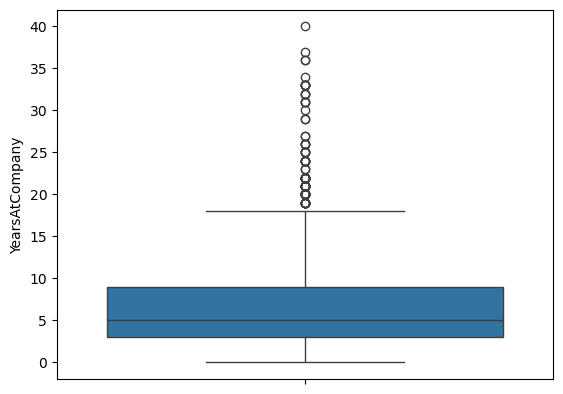

In [182]:
sns.boxplot(df, y='YearsAtCompany');

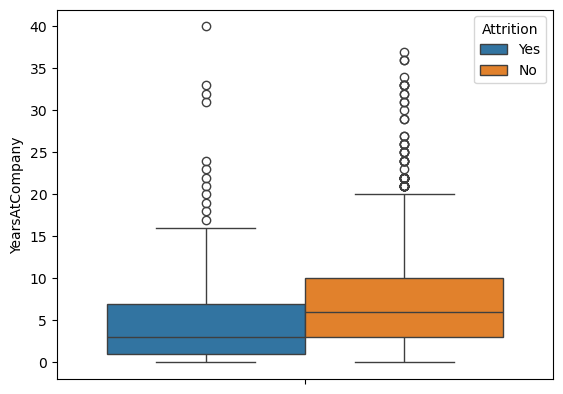

In [184]:
## Уволились те, кто меньше работал

sns.boxplot(df, y='YearsAtCompany', hue='Attrition');

In [186]:
df['YearsInCurrentRole'].nunique()

19

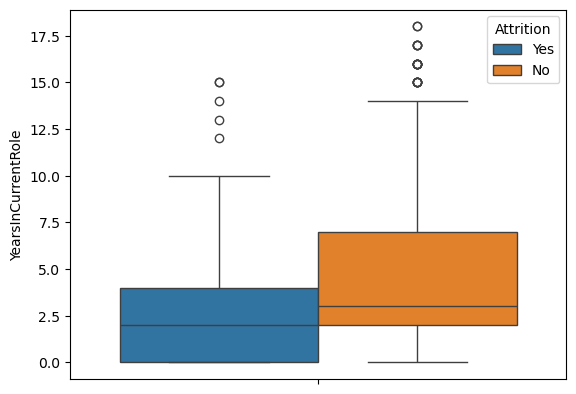

In [188]:
## Увольняются те, кто на данной должности находится меньше

sns.boxplot(df, y='YearsInCurrentRole', hue='Attrition');

In [190]:
df['YearsSinceLastPromotion'].nunique()

16

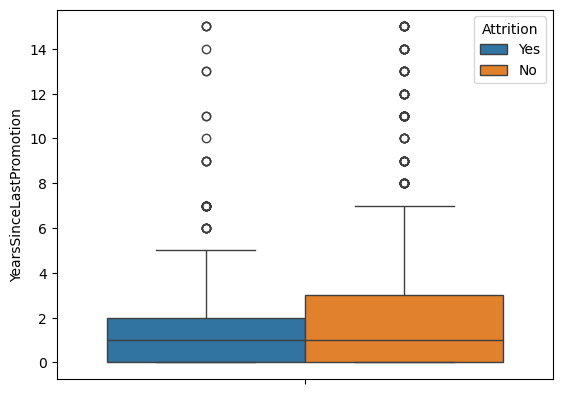

In [192]:
## не сильно влияет

sns.boxplot(df, y='YearsSinceLastPromotion', hue='Attrition');

In [194]:
df['YearsWithCurrManager'].nunique()

18

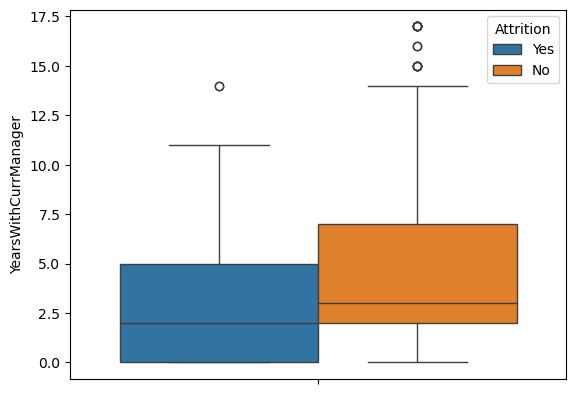

In [196]:
## Чаще увольняются те, кто меньше с нынешним менеджером

sns.boxplot(df, y='YearsWithCurrManager', hue='Attrition');

Набор данных содержит много различной информации, а также разброс некоторых значений достаточно высок. Однако мной принято решение не выделять некоторые значения как выбросы, так как в данном случае это просто особенность данных

In [199]:
## Также отсутствуют дубликаты

df.duplicated().sum()

0

In [201]:
## Сделаем категориальные переменные dummie переменными

object_cols = df.select_dtypes('object').columns.to_list()
df = pd.get_dummies(df, columns=object_cols, drop_first=True)

In [203]:
df

Age  DailyRate  DistanceFromHome  Education  \
EmployeeNumber                                                
1                41       1102                 1          2   
2                49        279                 8          1   
4                37       1373                 2          2   
5                33       1392                 3          4   
7                27        591                 2          1   
...             ...        ...               ...        ...   
2061             36        884                23          2   
2062             39        613                 6          1   
2064             27        155                 4          3   
2065             49       1023                 2          3   
2068             34        628                 8          3   

                EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
EmployeeNumber                                                                  
1                                     2          94               3         2   
2                                     3          61               2         2   
4                                     4          92               2         1   
5                                     4          56               3         1   
7                                     1          40               3         1   
...                                 ...         ...             ...       ...   
2061                                  3          41               4         2   
2062                                  4          42               2         3   
2064                                  2          87               4         2   
2065                                  4          63               2         2   
2068                                  2          82               4         2   

                JobSatisfaction  MonthlyIncome  ...  \
EmployeeNumber                                  ...   
1                             4           5993  ...   
2                             2           5130  ...   
4                             3           2090  ...   
5                             3           2909  ...   
7                             2           3468  ...   
...                         ...            ...  ...   
2061                          4           2571  ...   
2062                          1           9991  ...   
2064                          2           6142  ...   
2065                          2           5390  ...   
2068                          3           4404  ...   

                JobRole_Laboratory Technician  JobRole_Manager  \
EmployeeNumber                                                   
1                                       False            False   
2                                       False            False   
4                                        True            False   
5                                       False            False   
7                                        True            False   
...                                       ...              ...   
2061                                     True            False   
2062                                    False            False   
2064                                    False            False   
2065                                    False            False   
2068                                     True            False   

                JobRole_Manufacturing Director  JobRole_Research Director  \
EmployeeNumber                                                              
1                                        False                      False   
2                                        False                      False   
4                                        False                      False   
5                                        False                      False   
7                                        False                      False   
...                         

In [205]:
df.corr()['Attrition_Yes'].sort_values()

TotalWorkingYears                   -0.171063
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
MonthlyIncome                       -0.159840
Age                                 -0.159205
YearsWithCurrManager                -0.156199
StockOptionLevel                    -0.137145
YearsAtCompany                      -0.134392
JobInvolvement                      -0.130016
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
JobRole_Manufacturing Director      -0.082994
WorkLifeBalance                     -0.063939
TrainingTimesLastYear               -0.059478
DailyRate                           -0.056652
BusinessTravel_Travel_Rarely        -0.049538
EducationField_Medical              -0.046999
RelationshipSatisfaction          

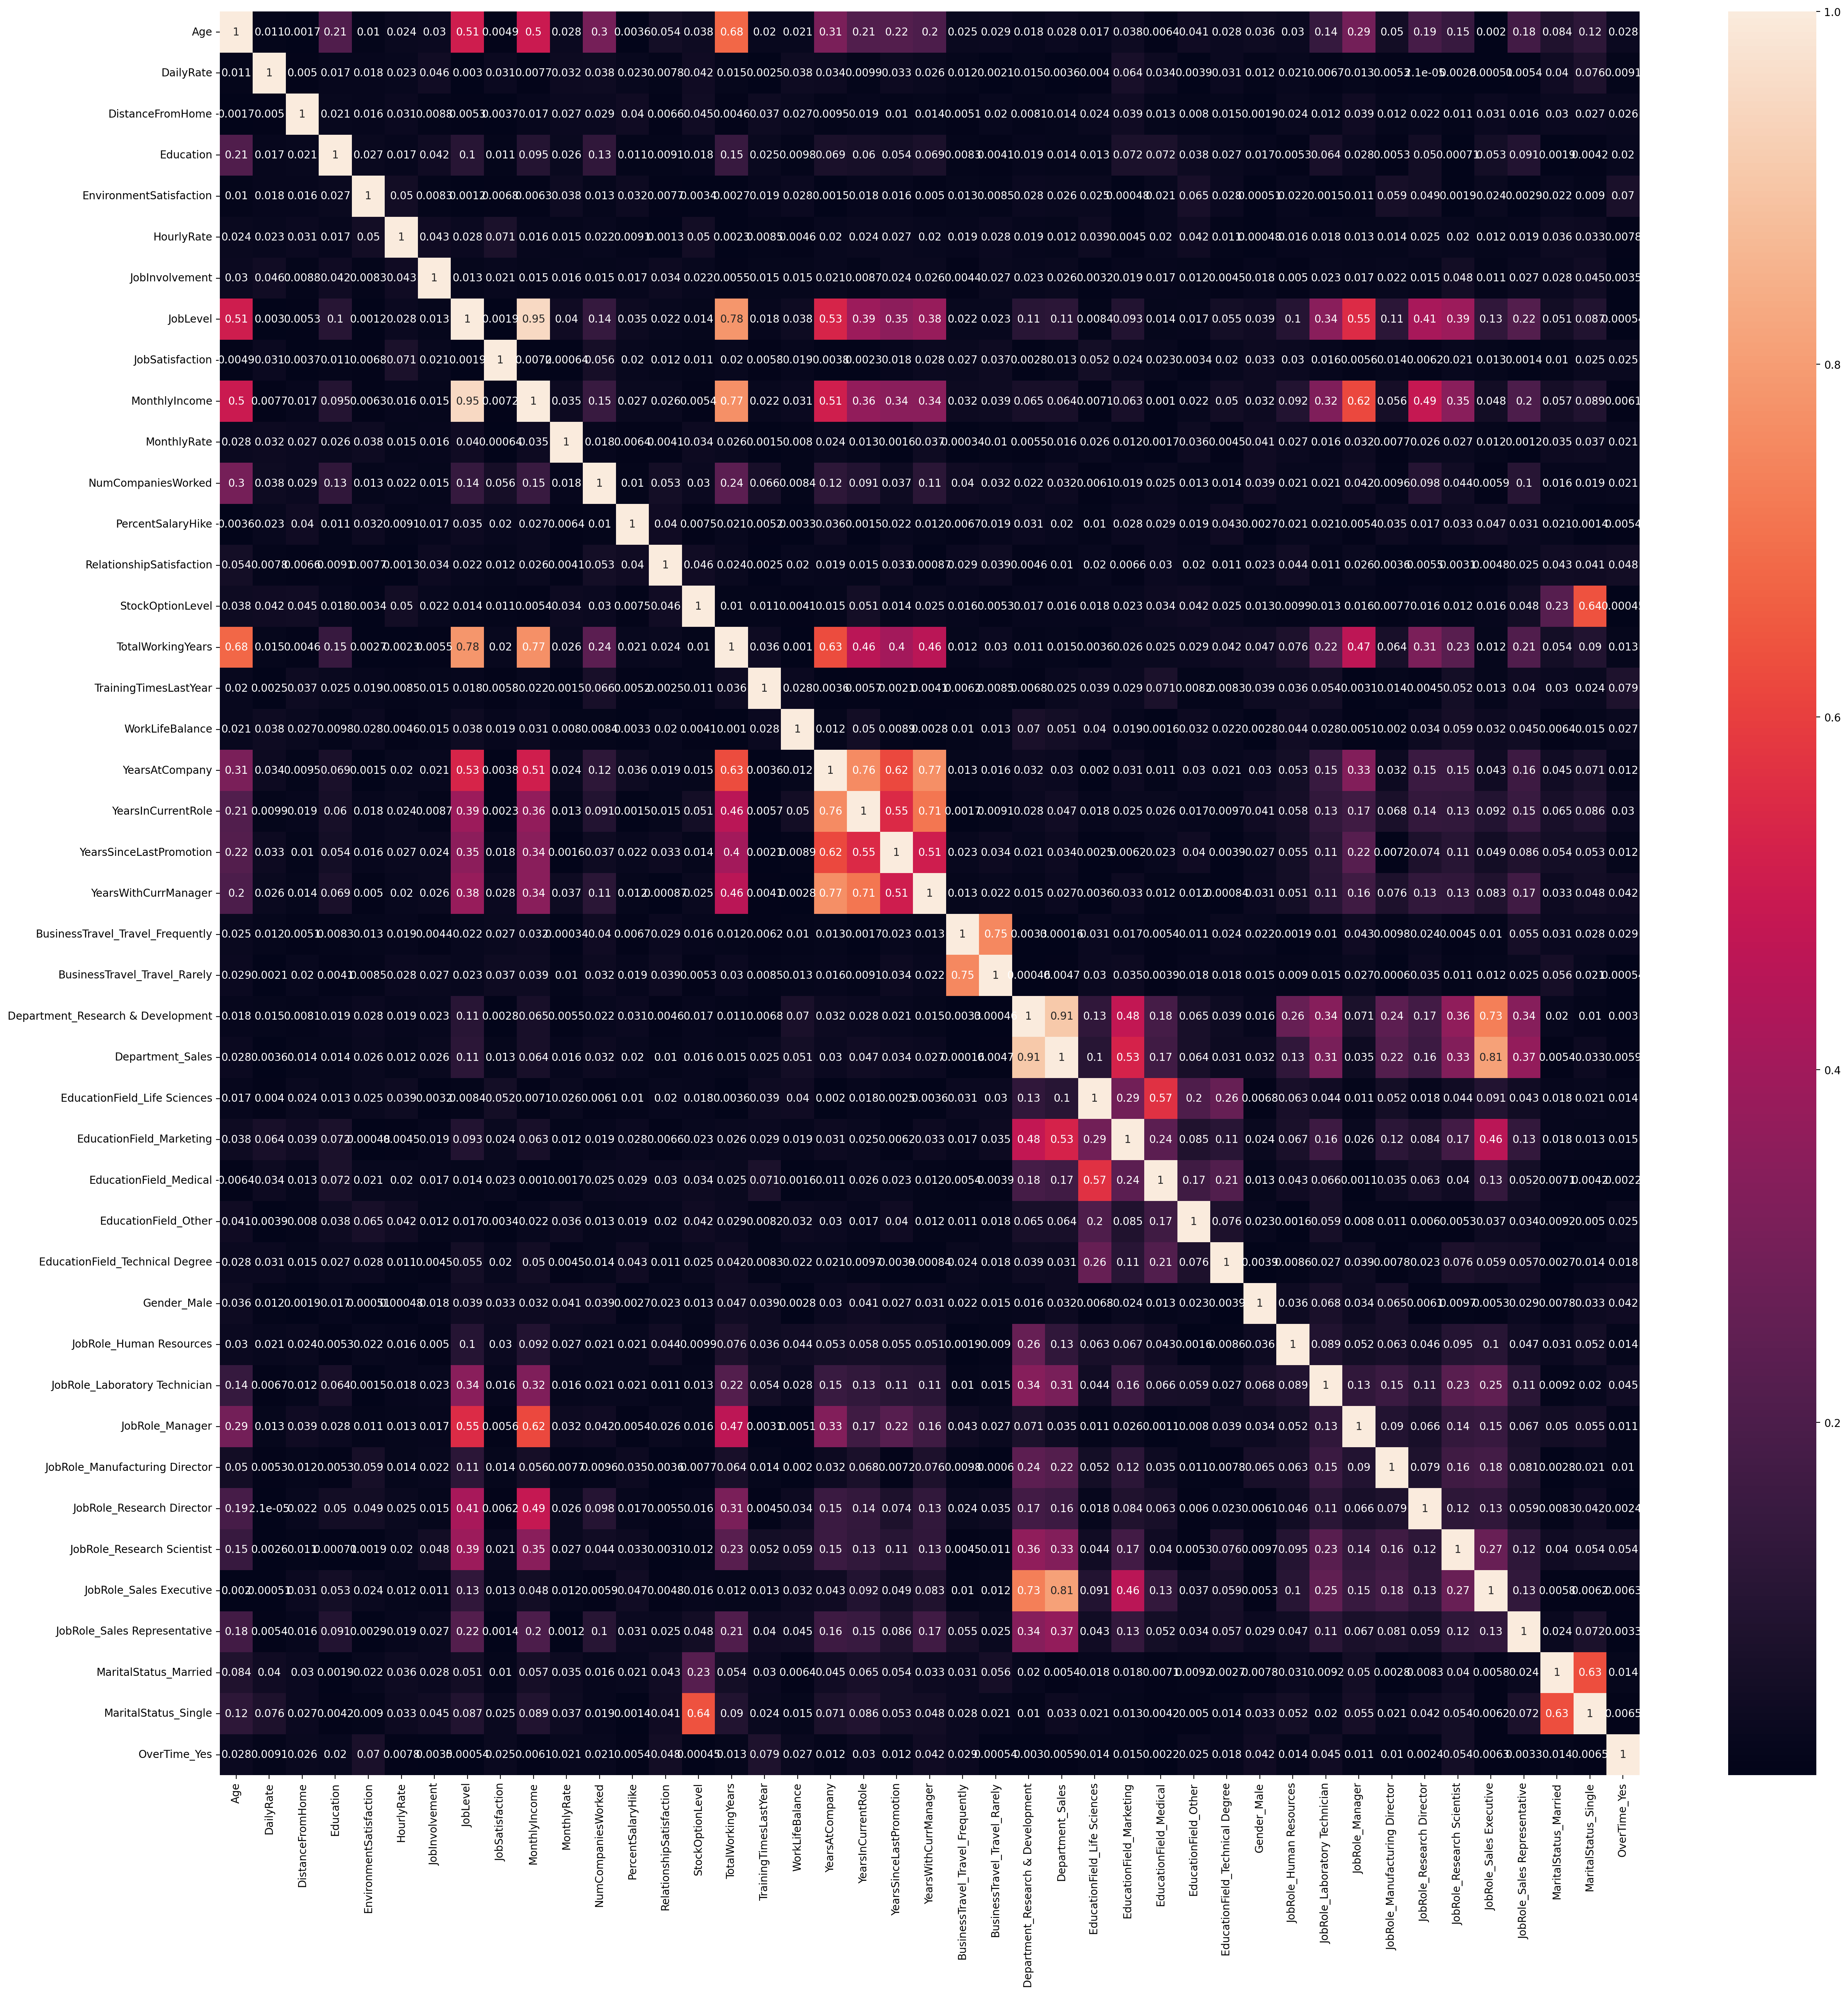

In [207]:
## Здесь мы хорошо видим корреляцию признаков друг с другом

plt.figure(figsize=(30, 30), dpi=200)

sns.heatmap(df.drop(['Attrition_Yes'], axis=1).corr().abs(), annot=True);

Мною принято решение удалять те признаки, которые коррелируют на 0.7+ с другими признаками. Удаляю:
1. JobLevel
2. MonthlyIncome
3. YearsAtCompany
4. YearsInCurrentRole
5. BusinessTravel_Travel_Frequently
6. Department_Sales
7. Department_Research & Development

In [210]:
df = df.drop(['JobLevel', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'BusinessTravel_Travel_Frequently',
              'Department_Sales', 'Department_Research & Development'], axis=1)

In [212]:
df.head()

Age  DailyRate  DistanceFromHome  Education  \
EmployeeNumber                                                
1                41       1102                 1          2   
2                49        279                 8          1   
4                37       1373                 2          2   
5                33       1392                 3          4   
7                27        591                 2          1   

                EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
EmployeeNumber                                                        
1                                     2          94               3   
2                                     3          61               2   
4                                     4          92               2   
5                                     4          56               3   
7                                     1          40               3   

                JobSatisfaction  MonthlyRate  NumCompaniesWorked  ...  \
EmployeeNumber                                                    ...   
1                             4        19479                   8  ...   
2                             2        24907                   1  ...   
4                             3         2396                   6  ...   
5                             3        23159                   1  ...   
7                             2        16632                   9  ...   

                JobRole_Laboratory Technician  JobRole_Manager  \
EmployeeNumber                                                   
1                                       False            False   
2                                       False            False   
4                                        True            False   
5                                       False            False   
7                                        True            False   

                JobRole_Manufacturing Director  JobRole_Research Director  \
EmployeeNumber                                                              
1                                        False                      False   
2                                        False                      False   
4                                        False                      False   
5                                        False                      False   
7                                        False                      False   

                JobRole_Research Scientist  JobRole_Sales Executive  \
EmployeeNumber                                                        
1                                    False                     True   
2                                     True                    False   
4                                    False                    False   
5                                     True                    False   
7                                    False                    False   

                JobRole_Sales Representative  MaritalStatus_Married  \
EmployeeNumber                                                        
1                                      False                  False   
2                                      False                   True   
4                                      False                  False   
5                                      False                   True   
7                                      False                   True   

                MaritalStatus_Single  OverTime_Yes  
EmployeeNumber                                      
1                               True          True  
2                              False         False  
4                               True          True  
5                              False          True  
7                              False         False  

[5 rows x 37 columns]

Теперь можно приступать к решению задачи классификации. Разобъем датасет на признаки и целевую переменную

In [215]:
X = df.drop('Attrition_Yes', axis=1)

In [217]:
y = df['Attrition_Yes']

Разобъем признаки и целевую переменные на тестовый и обучающий наборы. Так как мы будем использовать кросс-валидацию при поиске гиперпараметров, то сделаем тестовую выборку равной 15% от общего набора данных

In [220]:
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Сделаем стандартизацию значений 

In [225]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

При обучении будем проверять правильность на обучающем и тестовом наборах, чтобы не уйти в переобучение и чтобы модель выдавала хорошие значения для новых данных. Также будем использовать поиск по сетке, а в нем в качестве метрики установим f1 score, так как у нас неравное распределение классов, что уменьшит точность предсказания класса уволившихся.

Напишем функцию, в которую будем передавать модель, набор гиперпараметров и наши разбитые данные. Также будем выводить матрицу ошибок для наглядности результата. 

In [230]:
from sklearn.model_selection import GridSearchCV

In [232]:
from sklearn.metrics import confusion_matrix

In [234]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

In [273]:
def model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test):
    grid_model = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_model.fit(scaled_X_train, y_train)

    print(f'Лучшие параметры: {grid_model.best_params_}')

    fig, axs = plt.subplots(nrows=1 , ncols=2)
    train_predictions = grid_model.predict(scaled_X_train)
    sns.heatmap(confusion_matrix(y_train, train_predictions, labels=grid_model.classes_), annot=True, ax=axs[0], fmt='')
    axs[0].set_title('train')
    
    test_predictions = grid_model.predict(scaled_X_test)
    sns.heatmap(confusion_matrix(y_test, test_predictions, labels=grid_model.classes_), annot=True, ax=axs[1], fmt='')
    axs[1].set_title('test')

1. Логистическая регрессия

In [276]:
from sklearn.linear_model import LogisticRegression

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
2000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    

Лучшие параметры: {'C': 0.16141414141414143, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


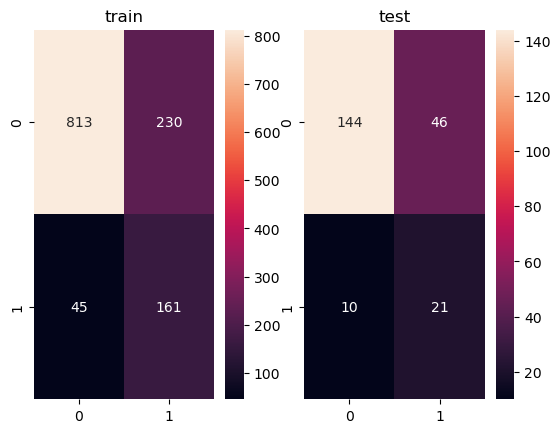

In [284]:
model = LogisticRegression(random_state=42, max_iter=50000)
param_grid = {'penalty': ['l1', 'l2'],
              'solver': ['lbfgs','liblinear','sag','saga'],
              'C': np.linspace(0.01, 15, 100),
              'class_weight': ['balanced', None]}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

В целом логистическая модель более менее хорошо справилась с поставленной задачей, однако нам бы хотелось уменьшить количество ложно положительных предсказаний, так как из 67 человек, которых модель классифицировала как уволившихся, на самом деле их всего 21

2. KNN

In [288]:
from sklearn.neighbors import KNeighborsClassifier

Лучшие параметры: {'n_neighbors': 1, 'weights': 'uniform'}


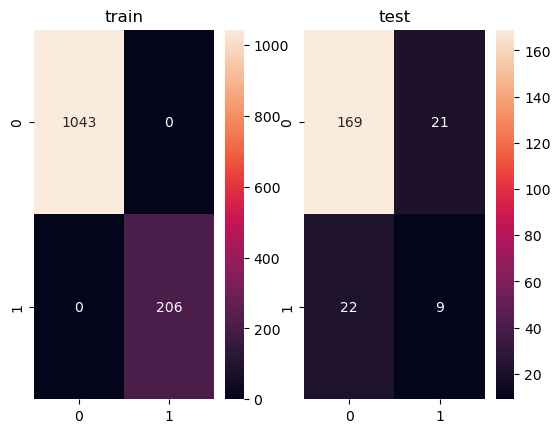

In [290]:
model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 50),
              'weights' : ['uniform', 'distance']}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

KNN ушел в предсказание класса 0, правильно определив всего 9 уволившихся человек. С поставленной задачей справился хуже чем логистическая регрессия

3. SVC

In [294]:
from sklearn.svm import SVC

Лучшие параметры: {'C': 0.638421052631579, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


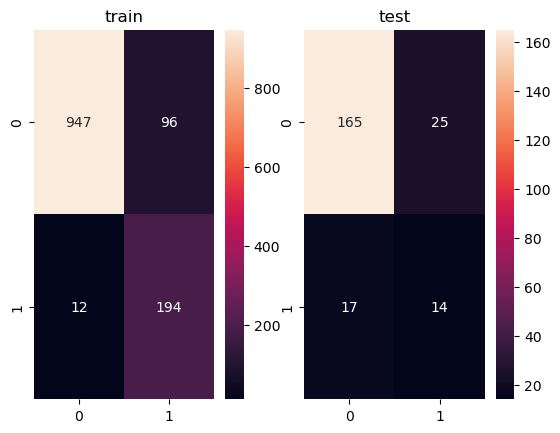

In [300]:
model = SVC(random_state=42)
param_grid = {'C': np.linspace(0.01, 2, 20), 
              'kernel': ['linear', 'rbf', 'poly'], 
              'gamma': ['scale', 'auto'], 
              'degree': [2, 3, 4],
              'class_weight': ['balanced', None]}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

SVC справилась с задачей явно лучше, чем KNN, однако не лучше чем логистическая регрессия, так как выявлено достаточно мало по-настоящему уволившихся.

4. Деревья решений

In [304]:
from sklearn.tree import DecisionTreeClassifier

Лучшие параметры: {'max_depth': 8, 'max_features': 15}


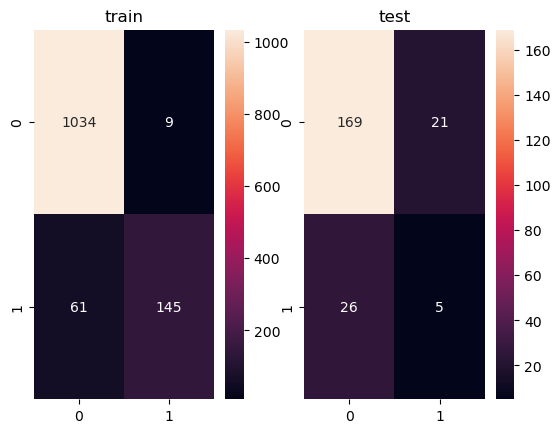

In [306]:
model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': range(1,30),
              'max_features': range(1, 30)}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

Одно дерево решений максимально неудачно справилось с задачей разделения классов

5. Случайный лес

In [309]:
from sklearn.ensemble import RandomForestClassifier

Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 64}


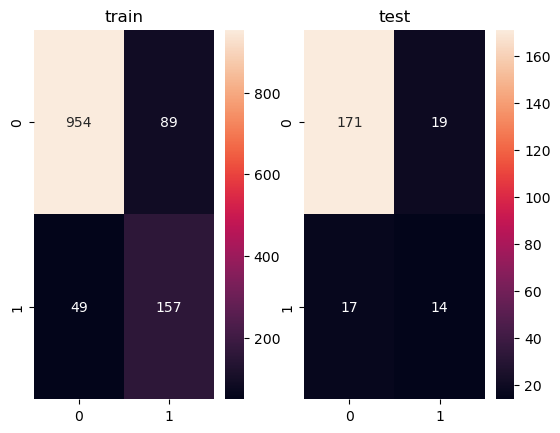

In [312]:
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [32, 64, 100],
              'max_depth': range(1, 10),
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': range(2, 5),
              'class_weight': ['balanced', None]}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

Модель случайного леса справилась лучше чем модель SVC.

6. Градиентный бустинг

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

Лучшие параметры: {'learning_rate': 0.8, 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


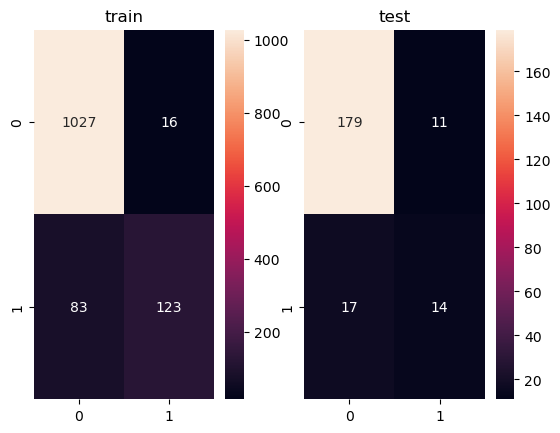

In [141]:
model = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [32, 64, 100],
              'max_depth': range(1, 11),
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': range(2, 5),
              'learning_rate': np.linspace(0, 1, 11)}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

По моему мнению, алгоритм градиентного бустинга показал себя лучше всех, так как у нас предсказана почти половина истинно выгоревших сотрудников, при этои ложно выгоревших всего 11 человек.

7. CatBoost

In [143]:
from catboost import CatBoostClassifier

Learning rate set to 0.085065
0:	learn: 0.6489627	total: 63ms	remaining: 6.24s
1:	learn: 0.6082197	total: 63.4ms	remaining: 3.11s
2:	learn: 0.5744738	total: 63.8ms	remaining: 2.06s
3:	learn: 0.5506813	total: 64.2ms	remaining: 1.54s
4:	learn: 0.5311128	total: 64.7ms	remaining: 1.23s
5:	learn: 0.5099796	total: 65ms	remaining: 1.02s
6:	learn: 0.4905818	total: 65.3ms	remaining: 868ms
7:	learn: 0.4749146	total: 65.7ms	remaining: 755ms
8:	learn: 0.4622493	total: 66.1ms	remaining: 669ms
9:	learn: 0.4547829	total: 66.5ms	remaining: 598ms
10:	learn: 0.4451858	total: 66.8ms	remaining: 540ms
11:	learn: 0.4374130	total: 67.1ms	remaining: 492ms
12:	learn: 0.4305815	total: 67.5ms	remaining: 452ms
13:	learn: 0.4248792	total: 67.9ms	remaining: 417ms
14:	learn: 0.4199459	total: 68.2ms	remaining: 386ms
15:	learn: 0.4155702	total: 68.5ms	remaining: 360ms
16:	learn: 0.4126002	total: 68.9ms	remaining: 336ms
17:	learn: 0.4083389	total: 69.2ms	remaining: 315ms
18:	learn: 0.4050231	total: 69.5ms	remaining: 29

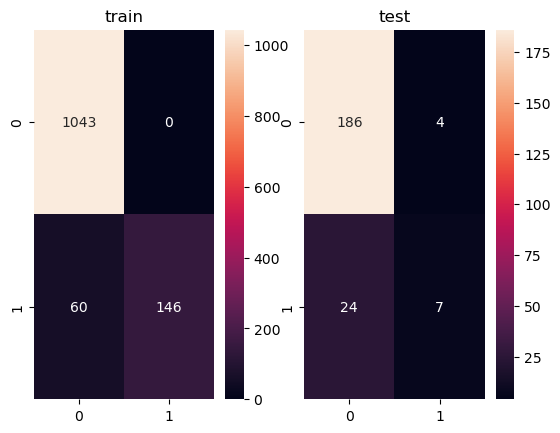

In [144]:
model = CatBoostClassifier(random_state=42, iterations=100)
param_grid = {'depth': range(1, 11)}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

0:	learn: 0.4122779	total: 2ms	remaining: 198ms
1:	learn: 0.3255782	total: 2.98ms	remaining: 146ms
2:	learn: 0.2908646	total: 3.76ms	remaining: 122ms
3:	learn: 0.2725818	total: 4.58ms	remaining: 110ms
4:	learn: 0.2563244	total: 5.47ms	remaining: 104ms
5:	learn: 0.2459093	total: 6.43ms	remaining: 101ms
6:	learn: 0.2292641	total: 7.26ms	remaining: 96.5ms
7:	learn: 0.2113857	total: 8.14ms	remaining: 93.7ms
8:	learn: 0.2003516	total: 8.94ms	remaining: 90.4ms
9:	learn: 0.1828432	total: 9.78ms	remaining: 88ms
10:	learn: 0.1678218	total: 10.5ms	remaining: 85ms
11:	learn: 0.1545206	total: 11.4ms	remaining: 83.4ms
12:	learn: 0.1465251	total: 12ms	remaining: 80.3ms
13:	learn: 0.1349007	total: 12.7ms	remaining: 78.1ms
14:	learn: 0.1278271	total: 13.4ms	remaining: 76.1ms
15:	learn: 0.1154413	total: 14.8ms	remaining: 77.6ms
16:	learn: 0.1089527	total: 15.6ms	remaining: 76.3ms
17:	learn: 0.0977780	total: 16.3ms	remaining: 74.2ms
18:	learn: 0.0919832	total: 17ms	remaining: 72.4ms
19:	learn: 0.0836404

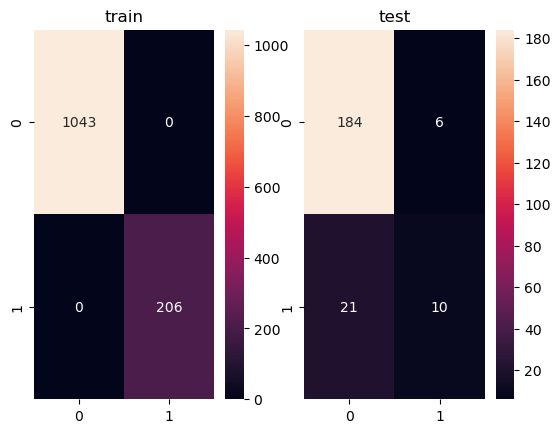

In [279]:
model = CatBoostClassifier(random_state=42, iterations=100, depth=5)
param_grid = {'learning_rate': np.linspace(0.8, 1, 20)}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

0:	learn: 0.4062863	total: 5.24ms	remaining: 519ms
1:	learn: 0.3198417	total: 6.1ms	remaining: 299ms
2:	learn: 0.2961258	total: 6.69ms	remaining: 216ms
3:	learn: 0.2772675	total: 7.36ms	remaining: 177ms
4:	learn: 0.2510356	total: 7.93ms	remaining: 151ms
5:	learn: 0.2254111	total: 8.53ms	remaining: 134ms
6:	learn: 0.2027491	total: 9.06ms	remaining: 120ms
7:	learn: 0.1846737	total: 9.55ms	remaining: 110ms
8:	learn: 0.1703758	total: 10.1ms	remaining: 102ms
9:	learn: 0.1553877	total: 10.8ms	remaining: 96.9ms
10:	learn: 0.1374363	total: 11.4ms	remaining: 92.4ms
11:	learn: 0.1230518	total: 12ms	remaining: 87.8ms
12:	learn: 0.1106168	total: 12.6ms	remaining: 84.3ms
13:	learn: 0.1003172	total: 13.2ms	remaining: 80.9ms
14:	learn: 0.0927425	total: 13.8ms	remaining: 77.9ms
15:	learn: 0.0799589	total: 14.4ms	remaining: 75.5ms
16:	learn: 0.0703489	total: 15ms	remaining: 73.2ms
17:	learn: 0.0623398	total: 15.6ms	remaining: 70.9ms
18:	learn: 0.0528108	total: 16.1ms	remaining: 68.7ms
19:	learn: 0.0462

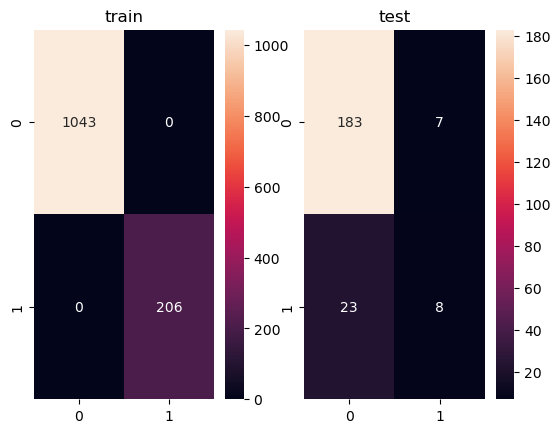

In [286]:
model = CatBoostClassifier(random_state=42, iterations=100, depth=5, learning_rate=0.83)
param_grid = {'l2_leaf_reg': [0, 0.5, 1, 1.5, 1.75, 2]}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

0:	learn: 0.4084028	total: 3.06ms	remaining: 3.05s
1:	learn: 0.3543742	total: 4.04ms	remaining: 2.02s
2:	learn: 0.3003429	total: 4.78ms	remaining: 1.59s
3:	learn: 0.2668607	total: 5.54ms	remaining: 1.38s
4:	learn: 0.2501624	total: 6.32ms	remaining: 1.26s
5:	learn: 0.2327863	total: 7.07ms	remaining: 1.17s
6:	learn: 0.2154467	total: 7.77ms	remaining: 1.1s
7:	learn: 0.2002760	total: 8.63ms	remaining: 1.07s
8:	learn: 0.1873412	total: 9.38ms	remaining: 1.03s
9:	learn: 0.1753091	total: 10.2ms	remaining: 1.01s
10:	learn: 0.1623772	total: 11.2ms	remaining: 1.01s
11:	learn: 0.1470987	total: 12.5ms	remaining: 1.02s
12:	learn: 0.1374619	total: 13.2ms	remaining: 1s
13:	learn: 0.1271783	total: 14ms	remaining: 989ms
14:	learn: 0.1163863	total: 14.7ms	remaining: 968ms
15:	learn: 0.1079331	total: 15.4ms	remaining: 950ms
16:	learn: 0.0975610	total: 16.2ms	remaining: 936ms
17:	learn: 0.0894719	total: 17.1ms	remaining: 932ms
18:	learn: 0.0834129	total: 17.8ms	remaining: 920ms
19:	learn: 0.0766423	total: 

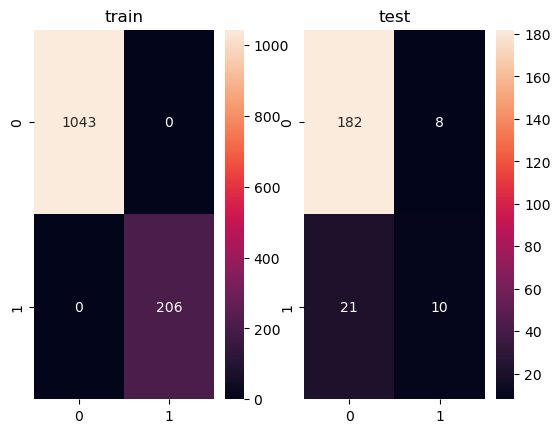

In [281]:
model = CatBoostClassifier(random_state=42, iterations=1000, depth=5, learning_rate=0.83, l2_leaf_reg=1.5)
param_grid = {}
model_report(model, param_grid, scaled_X_train, y_train, scaled_X_test, y_test)

Модель CatBoost показала себя хуже чем градиентный бустинг.

Исходя из того факта, что нам нужно определить как можно больше уволившихся людей, у нас есть 2 возможных варианта для принятия решения:
1. LogisticRegression - потому что там мы смогли выявить 20 из 31 уволившихся людей, однако у нас целых 50 ложно уволившихся. При этом, можно провести дополнительное мини анкетирование этих людей (например опрос в гугл-форме), который не займет много лишнего времени, но поможет отделить людей, которые хотят уволиться.
2. GradientBoostingClassifier - потому что из 31 уволившихся получилось правильно классифицировать 14 человек (почти половину), что составляет меньше чем в логистической регрессии. Однако если мы не хотим проводить мини опрос, а выбираем какой-то другой способ дополнительного тестирования, который займет больше времени (например личная беседа менеджера отдела), то ложно классифицированных человек всего 11 (на 39 меньше), что позволит не так много времени на это затратить.